In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import _autolag
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
import seaborn as sns
#sns.set_theme()
#from scipy.stats import pearsonr

DATA PREPARATION

In [200]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code_monthly_deflated_avg")
df=data_df.loc[:,["months", "price_gas", "price_brent_gbp","open_interest_gas","lng","storage","temperature","euas","supply","coal_gbp","eurgbp","gbpusd","churn","temp_deviation","price_range","price_gas_avg", "price_brent_usd","storage_dev","usd_gbp","share_lng"]] 
print(df)


#start at 15 for churn
#first ets value at line 38

     months   price_gas  price_brent_gbp  open_interest_gas       lng  \
0    Oct 09   38.176606        50.737045             18.582  1.340000   
1    Nov 09   35.041633        53.233565             13.795  1.270000   
2    Dec 09   35.715393        52.288674             12.590  1.670000   
3    Jan 10   41.151481        54.302797             13.650  1.540000   
4    Feb 10   38.872449        55.081704             12.720  1.330000   
..      ...         ...              ...                ...       ...   
145  Nov 21  183.586741        53.162419             45.540  1.387771   
146  Dec 21  251.302819        47.738814             45.135  2.011959   
147  Jan 22  178.944299        56.173519             37.335  3.146688   
148  Feb 22  169.752159        62.720169             33.040  2.051291   
149  Mar 22  266.303049        76.207482             25.101  2.154597   

      storage  temperature      euas     supply    coal_gbp    eurgbp  \
0   -0.200000        12.80   12.3590   6.430000   

In [201]:
#Vector:
dprice_gas=df.price_gas
dprice_gas_avg=df.price_gas_avg
dprice_brent_gbp=df.price_brent_gbp
dprice_brent_usd=df.price_brent_usd
dOI=df.open_interest_gas
dtemp=df.temperature
dtempdev=df.temp_deviation
dstore=df.storage
dlng=df.lng
dshare_lng=df.share_lng
dsupply=df.supply
dEUAs=df.euas
dEUR=df.eurgbp
dGBPUSD=df.gbpusd
dcoal=df.coal_gbp
dchurn=df.churn
drange=df.price_range
dstore_dev=df.storage_dev
dUSDGBP=df.usd_gbp


time= df.months
DataSeries=[dtempdev, dprice_brent_usd, dGBPUSD, dstore_dev, dshare_lng, dchurn, dprice_gas_avg]
#DataSeries=[dprice_gas,dsupply, dlng, dstore, dtemp, dtempdev]

#DataSeries=[dprice_gas,dprice_brent_gbp,dOI,dstore,dlng,dtemp,dsupply,dEUAs,dchurn,dtempdev,dEUR,dUSD,dcoal]
df_test = pd.concat(DataSeries,axis=1)

In [202]:
######### INITIAL DATA TESTS #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary

from statsmodels.tsa.stattools import adfuller, kpss
######## NORMALITY TEST V2 ########

def normality_test_matrix(data, variables, test):    
    """Check normality test to comply with general model assumptions.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    test      : type of test to perform
    """

    col=['test statistic ','p-value ', 'lags used ']
    df = pd.DataFrame(np.zeros((len(variables), 3)), columns=col, index=variables)
    for r in df.index:
        if test == "Dickey-Fuller":
            dftestdickey = adfuller(data[r].values, autolag='AIC')
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestdickey[c]           
        elif test == "KPSS":
            dftestkpss = kpss(data[r].values, regression='c', nlags="auto")
            for c in range(0,len(col)):
                df.loc[r, col[c]] = dftestkpss[c]

    print("Results for "+test+" test")
    df.columns = [var + test for var in col]

    #df.index = [var for var in variables]s
    return df


### styles ###

def highlight_cells_DF(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e < 0.05 else highlight_false for e in series]  

def highlight_cells_KPSS(series):
    highlight_true = 'background-color: green;'
    highlight_false = 'background-color: red;'
    default = ''
    return [highlight_true if e > 0.05 else highlight_false for e in series]  


dfdifull = normality_test_matrix(df_test, variables = df_test.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)

Results for Dickey-Fuller test


In [203]:
dfkpss = normality_test_matrix(df_test, variables = df_test.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range

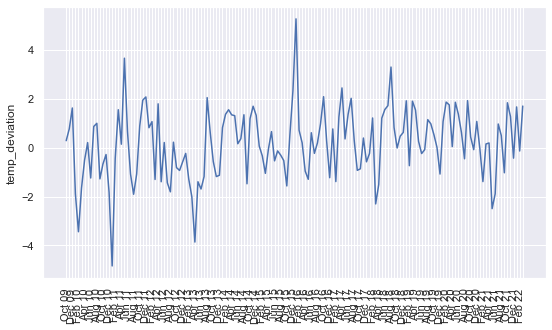

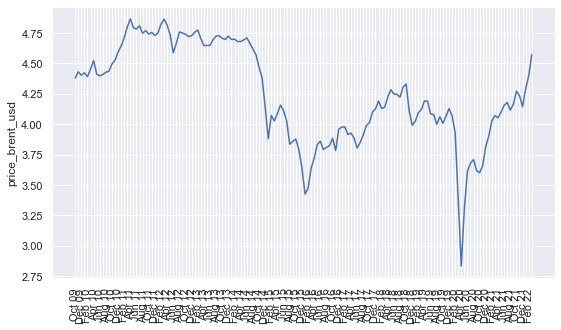

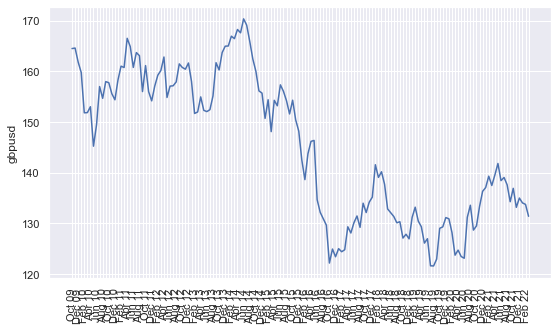

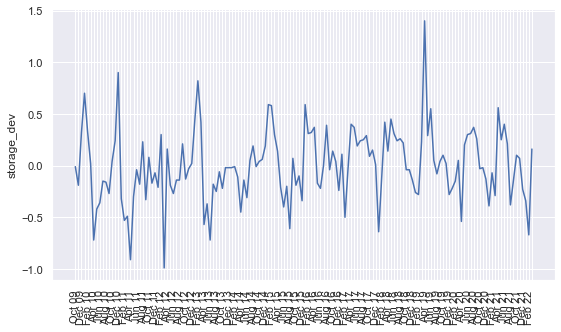

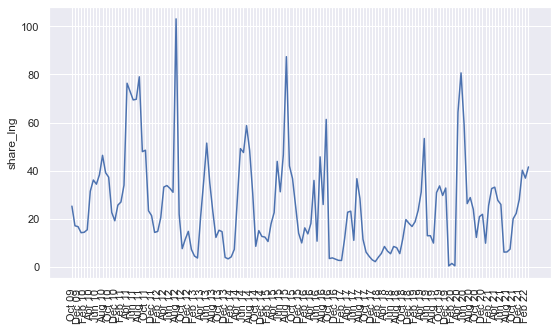

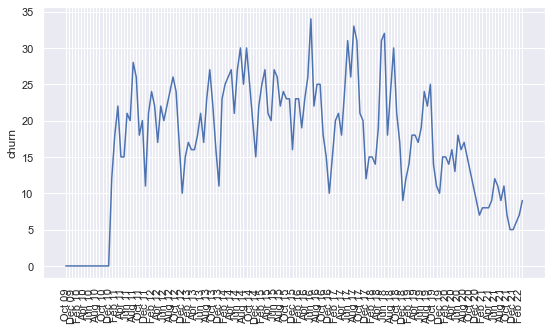

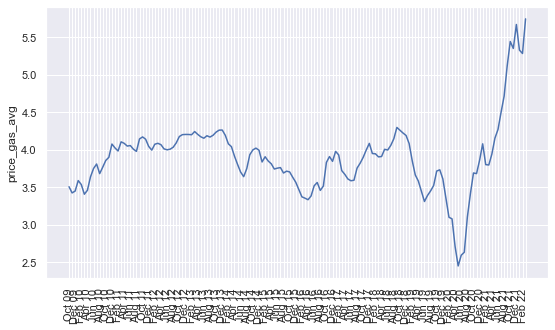

In [204]:
######### DATA CORRECTION #########
#ideally, for each set, apply specific changes
# detrending for linear processes
# differences for random walks 
# other ? non linear processes

#### initiate corrected series
DataSeriesCorr=[]

#### select correction mode
TypeCorr = 'mixed' # 'HP' for filtering or 'log' or 'bothHPlog'

HP =[]#['churn','usd_gbp']
loga = ['price_brent_usd','price_gas_avg']

for df in DataSeries:

    if TypeCorr == "log" or TypeCorr == 'bothHPlog' or TypeCorr == 'mixed':
            if df.name in loga:
                df_log = pd.Series(np.log(df))
                df = df_log

    if TypeCorr == 'HP' or TypeCorr == 'bothHPlog' or TypeCorr == 'mixed':
        if df.name in HP or TypeCorr == 'HP':
            cycle, trend = sm.tsa.filters.hpfilter(df, 129600)
            plt.plot(trend)
            plt.plot(cycle)
            cycle.name = df.name
            #trans = cycle/trend
            #plt.plot(trans)
            #trans.name = df.name
            df = cycle

    if TypeCorr == 'diff':
        df_diff = df.diff().dropna()
        df = df_diff

    plt.figure(figsize=(9, 5))
    if TypeCorr == 'diff':        
        plt.plot(time.iloc[1:], df)
    else: 
        plt.plot(time, df)
    plt.ylabel(df.name)
    ax = plt.gca()
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[1::2]:
        label.set_visible(False)
    plt.show()
    DataSeriesCorr.append(df)

df_corr = pd.concat(DataSeriesCorr,axis=1)

TRUNCATE DATASET

In [205]:
df_corr = df_corr.loc[15:140,:]
print(df_corr)

     temp_deviation  price_brent_usd    gbpusd  storage_dev  share_lng  churn  \
15        -4.838333         4.643241  158.2930        -0.32   25.60590     12   
16        -0.440000         4.710267  161.0047        -0.53   26.89189     18   
17         1.546667         4.800665  160.7407        -0.49   33.88430     22   
18         0.138333         4.866745  166.5002        -0.91   76.35328     15   
19         3.653333         4.792601  164.8777        -0.30   72.94118     15   
..              ...              ...       ...          ...        ...    ...   
136       -1.390000         4.027565  139.3000        -0.07   25.39336      8   
137        0.146667         4.069541  137.4665        -0.29   32.50912      8   
138        0.188333         4.052141  139.5284         0.56   33.08184      8   
139       -2.496667         4.099967  141.8037         0.25   27.59053      9   
140       -1.893333         4.156097  138.4275         0.40   25.89032     12   

     price_gas_avg  
15    

In [206]:
######### STATIONARITY DATA TEST #########

# stationarity describe an evolution following the same pattern overtime. Hence the relationship between variable are static
# stationarity test
# seasonality is not an issue as it can be predictable
# non linear trend can be corrected via applying a log
# take the difference to make the data stationary


dfdifull = normality_test_matrix(df_corr, variables = df_corr.columns, test="Dickey-Fuller")
dfdifull.style.apply(highlight_cells_DF, subset=['p-value Dickey-Fuller'], axis=0)


Results for Dickey-Fuller test


In [207]:
dfkpss = normality_test_matrix(df_corr, variables = df_corr.columns, test="KPSS")
dfkpss.style.apply(highlight_cells_KPSS, subset=['p-value KPSS'], axis=0)

Results for KPSS test


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [208]:
#### EXPORT NORMALISED DATA ####


df_export = df_corr

#df_export.insert(0,'months',time)
#print(df_export)
#df_export.to_excel(r'export_normal_data.xlsx', index = False)

#df_corr.drop(columns=['months'])
#print(df_corr)

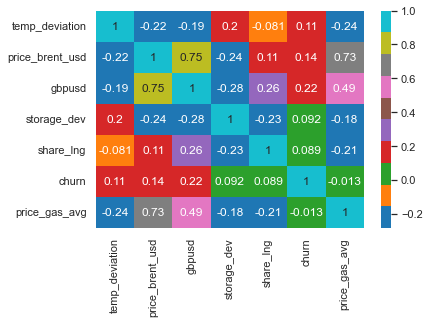

In [209]:
#### CORRELATION MATRIX ####

CorrelationMatrix=df_corr.corr()
ax=sns.heatmap(CorrelationMatrix, annot=True, cmap="tab10")


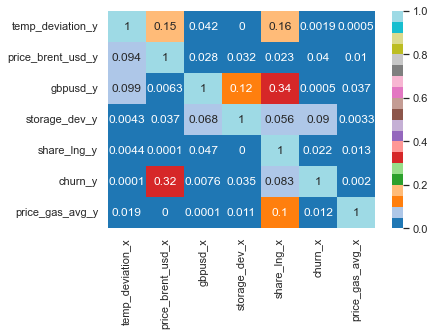

In [210]:
#### CORRECTED GRANGER CAUSALITY ####

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    #plot
    sns.heatmap(df, annot=True, cmap="tab20")
    #return df


##### actual test
#print(df_corr)
grangers_causation_matrix(df_corr, variables = df_corr.columns)        


/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


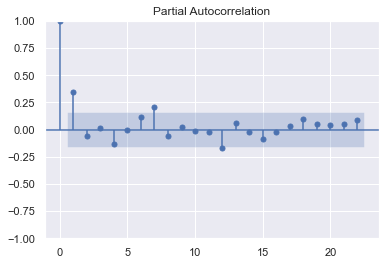

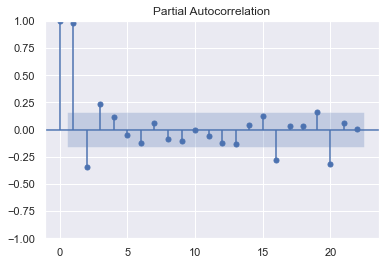

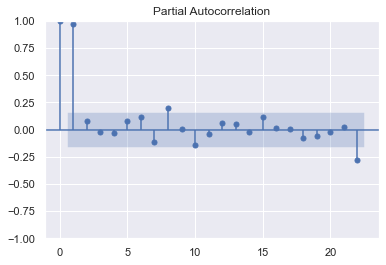

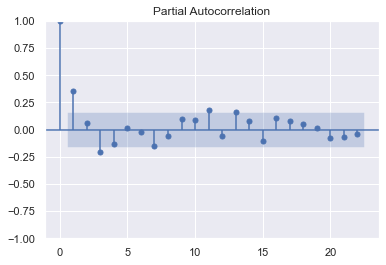

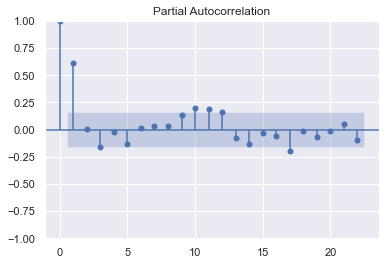

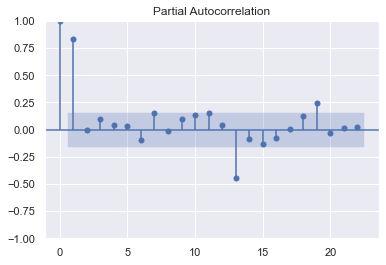

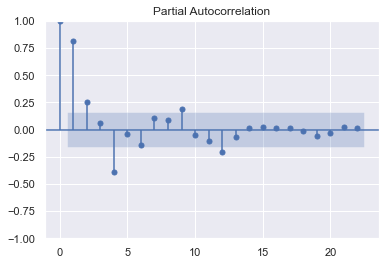

In [211]:
######### LAG LENGTH CRITERIA ######### either multiple of frequency or Schwarz, akaike, hannan-quinn, bayesian 

for df in DataSeries:
    plot_pacf(df)
    plt.show()

# for df in DataSeries:
#     lag_selection = _autolag(mod=VAR,endog=df, exog=df, startlag=1, maxlag=30, method="aic")
#     lag_selection.results()
#     #plt.show()


In [212]:
##### MODEL FITTING #####

model = VAR(df_corr)
x = model.select_order()
x.summary()
#model_fit = model.fit(maxlags=10, ic="aic") #aic, or bic
#model_fit.summary()


#model_fit.plot()


<class 'statsmodels.iolib.table.SimpleTable'>

In [213]:
##### MODEL FITTING BASED ON LAG CRITERIA RESULTS ######

lag_order =4
model_fit = model.fit(6)
model_fit.summary()

#model_fit.plot()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 26, Aug, 2022
Time:                     10:25:30
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    8.01031
Nobs:                     120.000    HQIC:                   3.85781
Log likelihood:          -952.009    FPE:                    3.49486
AIC:                      1.01835    Det(Omega_mle):        0.409624
--------------------------------------------------------------------
Results for equation temp_deviation
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      4.431721         1.899859            2.333           0.020
L1.temp_deviation          0.352512         0.116163            3.035           0.002
L1.price_brent_usd         1.15

True


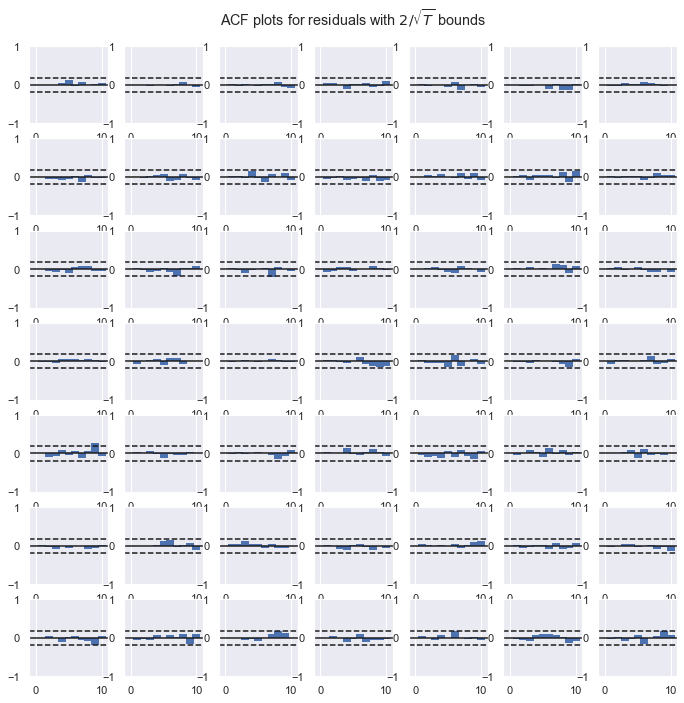

In [214]:
######### STABILITY RESIDUALS AUTOCORRELATION #########
accor = model_fit.plot_acorr()

stab = model_fit.is_stable()
print(stab)

#if residuals out of range -> unstable model 

In [215]:
######### GRANGER CAUSALITY TEST #########
#for gas price
#GrangerCausality = model_fit.test_causality('price_gas', ['lng'], kind='f')
#print(GrangerCausality.summary())

#granger causality test : HO not rejected => there is some causality between the variables

#importance of the order: if p value higher, does it mean that one variable is generating the other ?

In [216]:
######### NORMALITY TEST #########

TestNorm = model_fit.test_normality()
print(TestNorm.summary())

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         71.64          23.68   0.000 14
----------------------------------------


In [217]:
######### Whiteness TEST ######### (absence of significant residual autocorrelations)

TestWhite = model_fit.test_whiteness(nlags=18)
print(TestWhite.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 18 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         642.6          645.5   0.059 588
-----------------------------------------


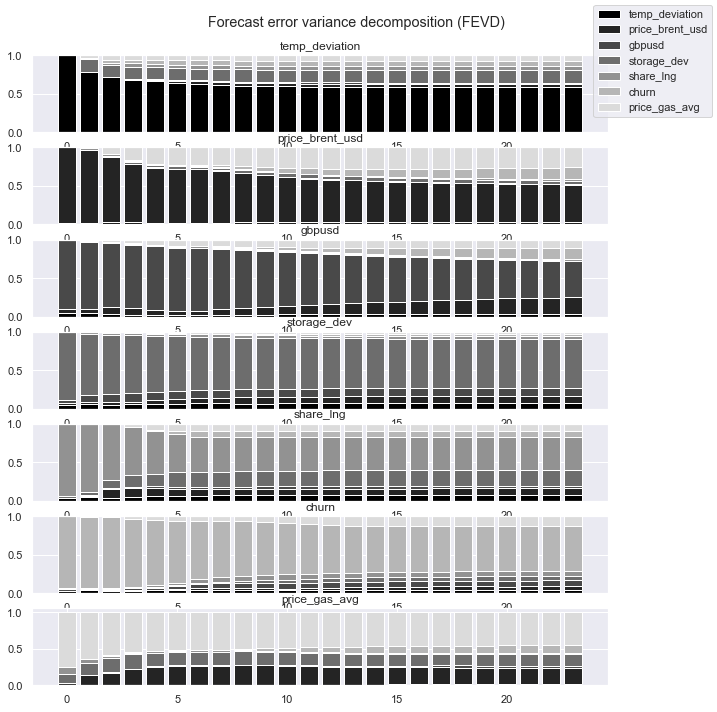

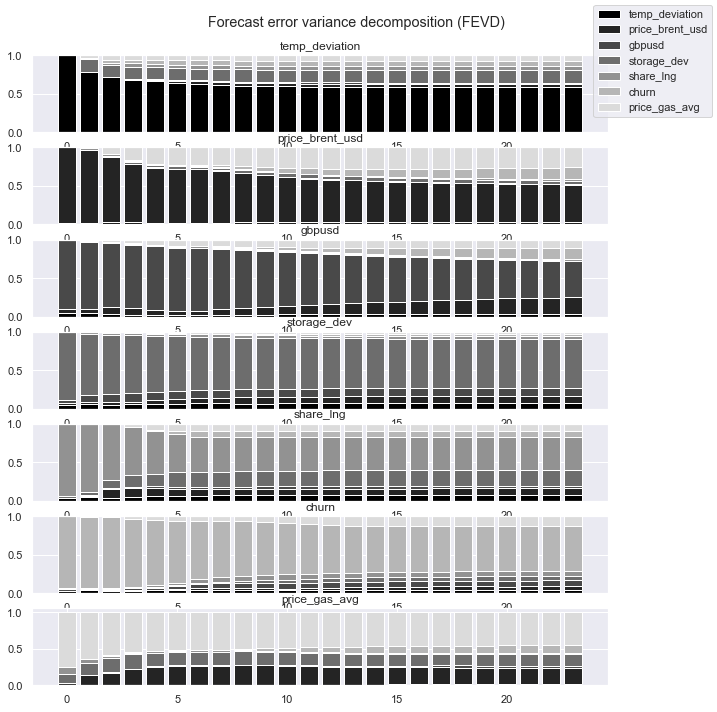

In [218]:
######### FORECAST VARIANCE ERROR DECOMPOSITION: #########

#only for 20 periods
n=24
VD = model_fit.fevd(n)
#fevd.summary()

#affichage pour n périodes
VD.plot()

IMPULSE RESPONSE ANALYSIS:

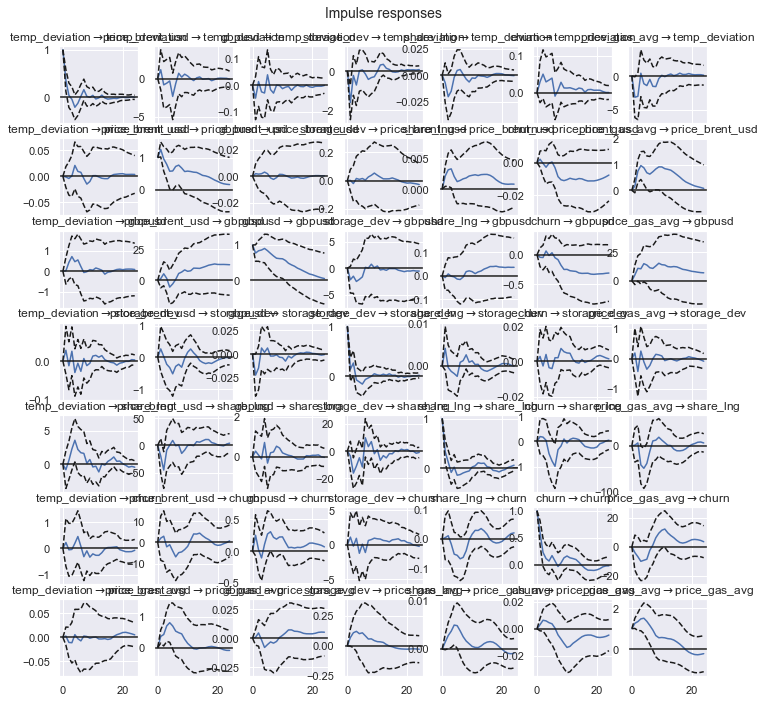

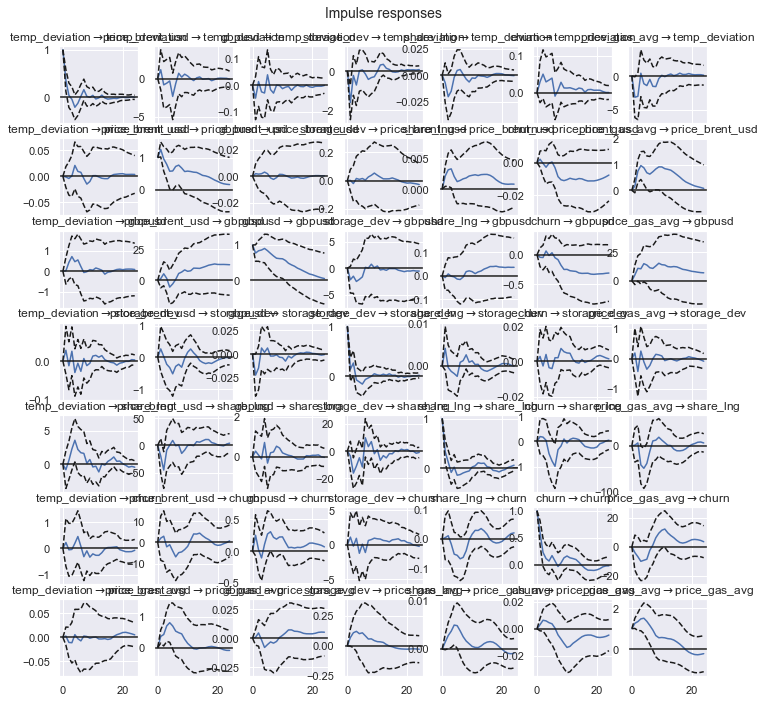

In [219]:
Impulse = model_fit.irf(24)

Impulse.plot()

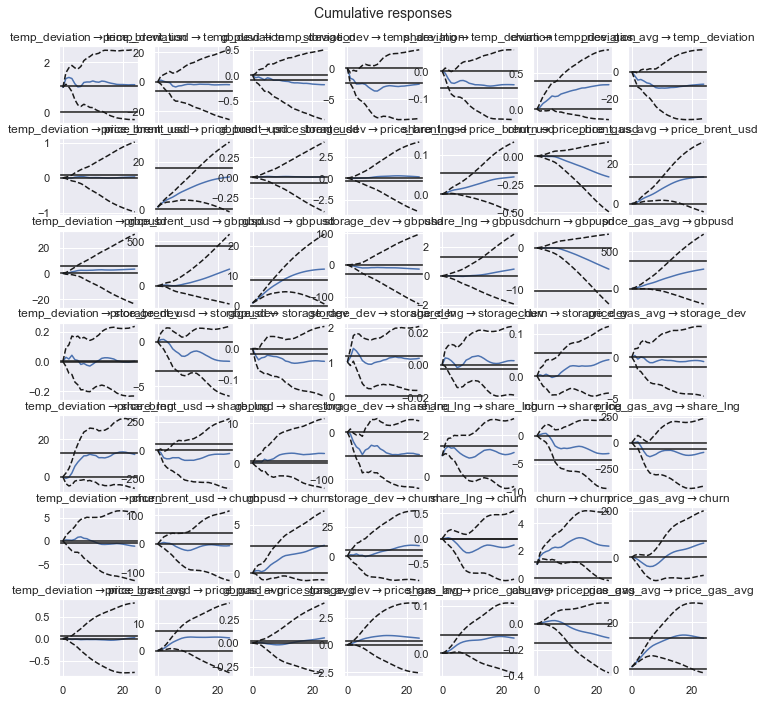

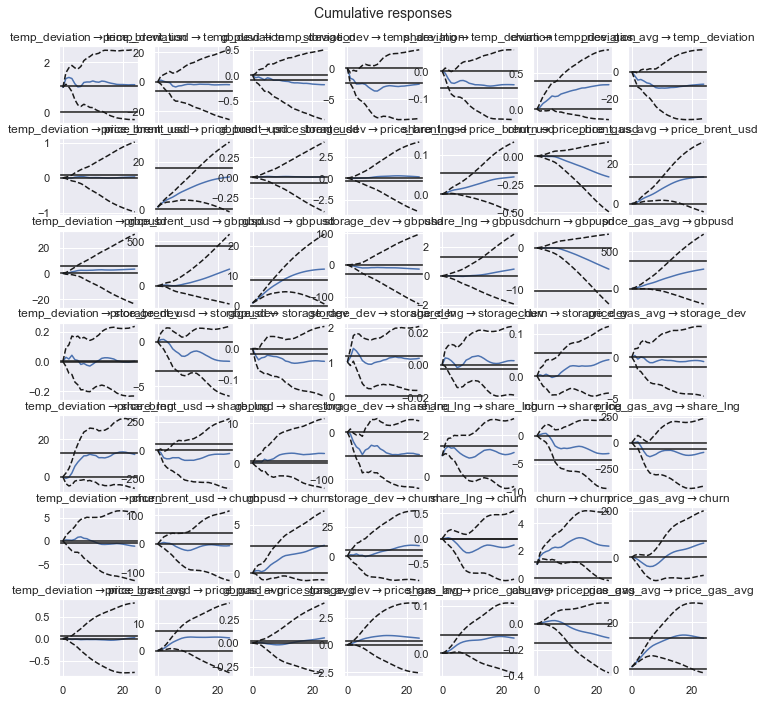

In [220]:
Impulse.plot_cum_effects(orth=False)

OTHER MODELS

In [221]:
from statsmodels.tsa.api import SVAR
 
lag_order = 3

#A = np.asarray([['E',0,0,0,0,0,0], [0,'E','E',0,0,0,0],[0,'E','E',0,0,0,0],['E',0,0,'E','E',0,'E'],['E',0,'E','E','E',0,'E'],['E','E','E','E','E','E','E'],['E','E','E','E','E',0,'E']])
#A = np.asarray([['E', 0, 0, 0, 0, 0, 0], [0, 'E', 0, 0, 0, 0, 0],[0, 0, 'E', 0, 0, 0, 0],[0, 0, 0, 'E', 0, 0, 'E'],[0, 0, 0, 0, 'E', 0, 'E'],['E', 'E', 'E', 'E', 'E', 'E', 'E'],['E', 'E', 'E', 'E', 'E', 0, 'E']])
A = np.asarray([['E', 0, 0, 0, 0, 0, 0], ['E', 'E', 0, 0, 0, 0, 0],['E', 'E', 'E', 0, 0, 0, 0],['E', 'E', 0, 'E', 0, 0, 'E'],['E', 'E', 0, 'E', 'E', 0, 'E'],['E', 'E', 'E', 'E', 'E', 'E', 0],['E', 'E', 'E', 'E', 'E', 'E', 'E']])
#A = np.asarray([['E', 0, 0, 0, 0, 0, 0], [0, 'E', 0, 0, 0, 0, 0],[0, 0, 'E', 0, 0, 0, 0],[0, 0, 0, 'E', 0, 0, 0],[0, 0, 0, 0, 'E', 0, 0],[0, 0, 0, 0, 0, 'E', 0],['E', 'E', 'E', 'E', 'E', 'E', 'E']]) 


StructModel = SVAR(df_corr,svar_type='A', A=A)

#dtempdev, dstore, dlng, dprice_brent_gbp, drange

ResSVAR = StructModel.fit(maxlags=lag_order, maxiter=100000, maxfun=100000, solver='bfgs')



/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [222]:
##### IS STABLE ? #####
Stab = ResSVAR.is_stable()
print("SVAR model is stable ? :   ",Stab)


SVAR model is stable ? :    True


In [223]:
######### Whiteness TEST ######### (absence of significant residual autocorrelations)

#TestWhite = ResSVAR.test_whiteness(nlags=12)
#print(TestWhite.summary())

TestWhite = ResSVAR.test_whiteness(nlags=24)
print(TestWhite.summary())  

#Portmanteau test

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 24 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value  df 
------------------------------------------
         936.9          1105.   0.981 1029
------------------------------------------


In [224]:
######### NORMALITY TEST #########

TestNorm = ResSVAR.test_normality(signif=0.05)
print(TestNorm.summary())

normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         149.0          23.68   0.000 14
----------------------------------------


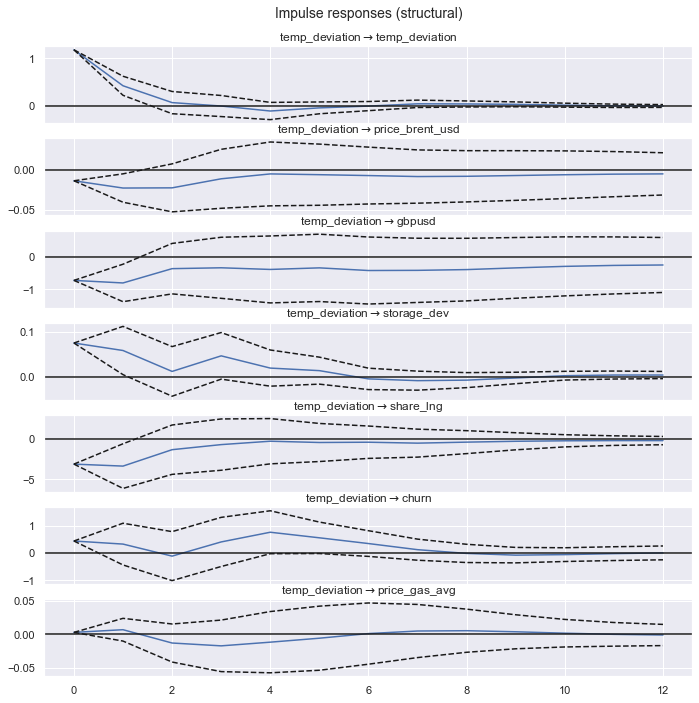

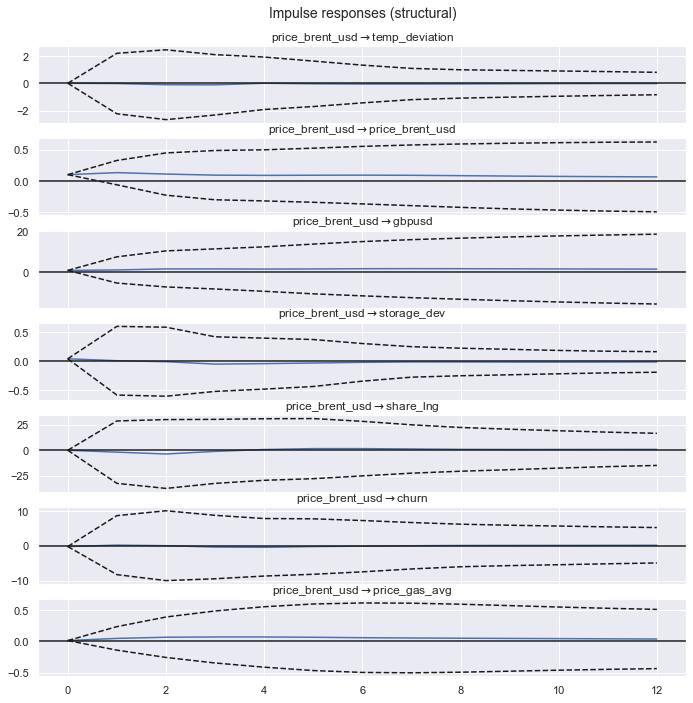

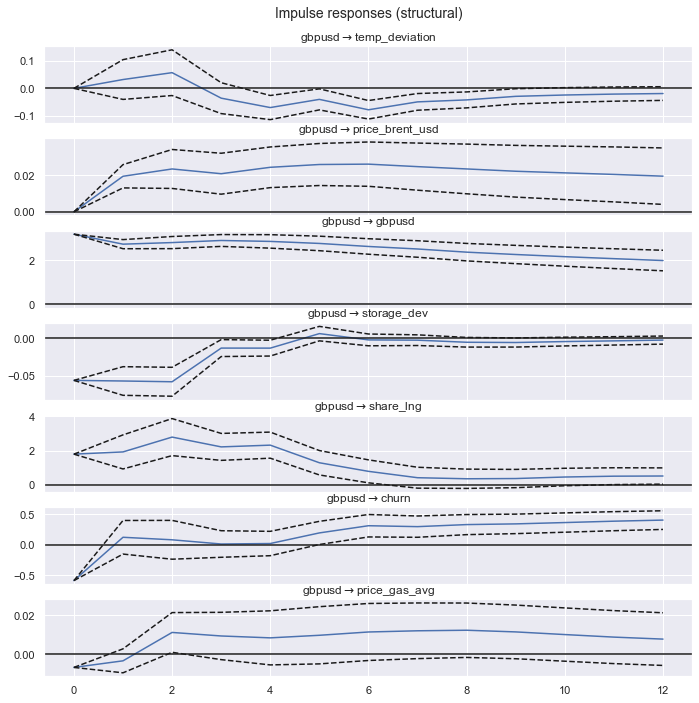

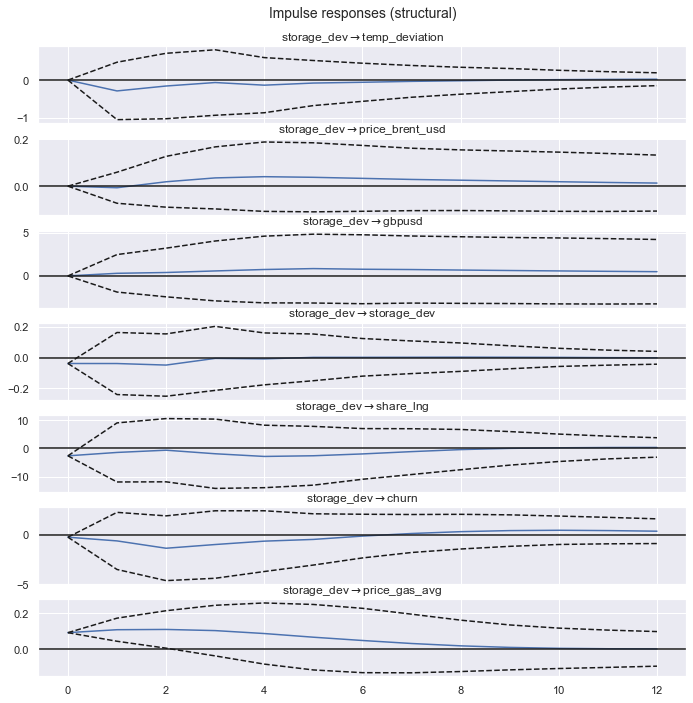

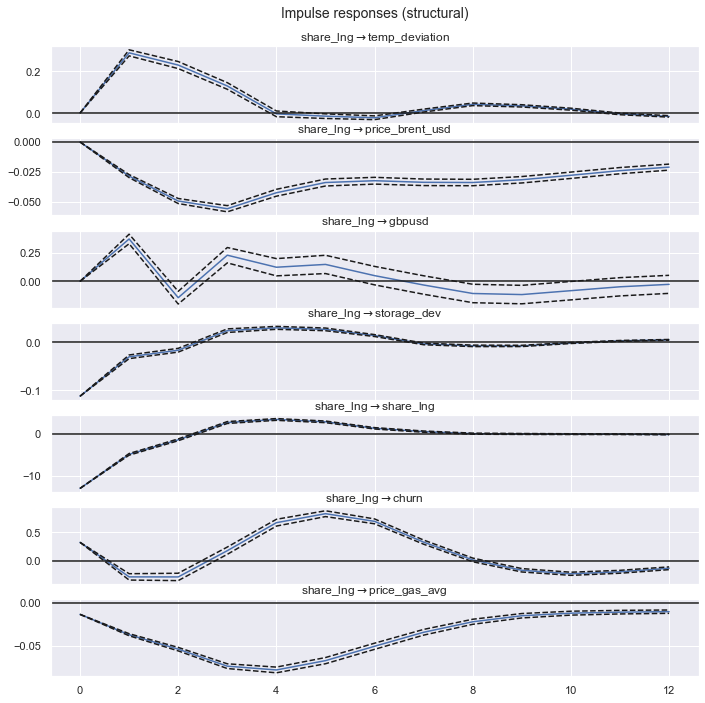

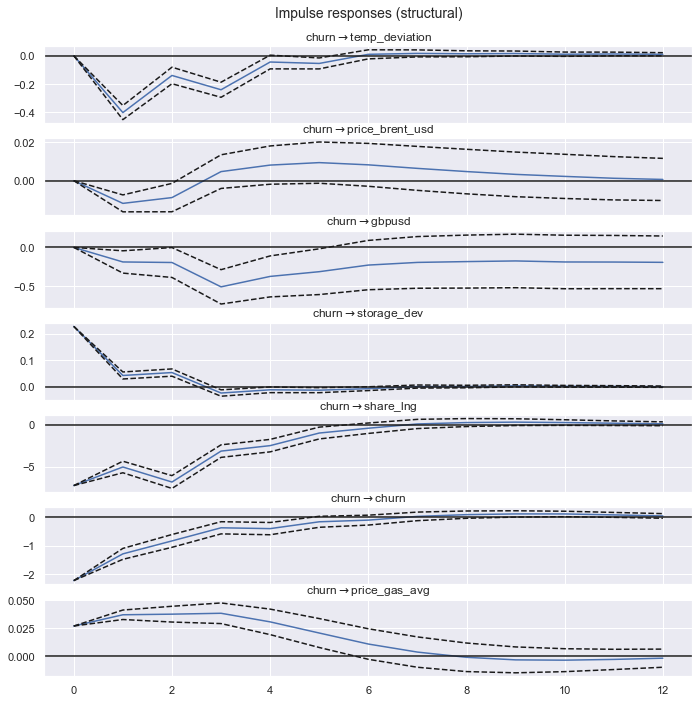

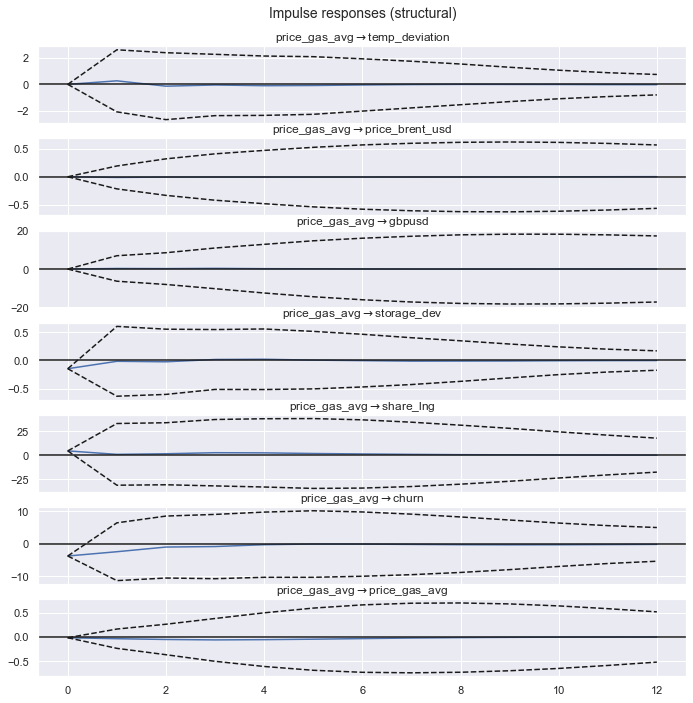

In [226]:
#### IR ####


ResSVAR.irf(periods=12).plot(impulse='temp_deviation')
ResSVAR.irf(periods=12).plot(impulse='price_brent_usd')
ResSVAR.irf(periods=12).plot(impulse='gbpusd')
ResSVAR.irf(periods=12).plot(impulse='storage_dev')
ResSVAR.irf(periods=12).plot(impulse='share_lng')
ResSVAR.irf(periods=12).plot(impulse='churn')
ResSVAR.irf(periods=12).plot(impulse='price_gas_avg')

ResSVAR.irf()


#ResSVAR.irf(periods=12).plot(impulse='price_gas_avg', plot_stderr=True,stderr_type='asym', repl=100)



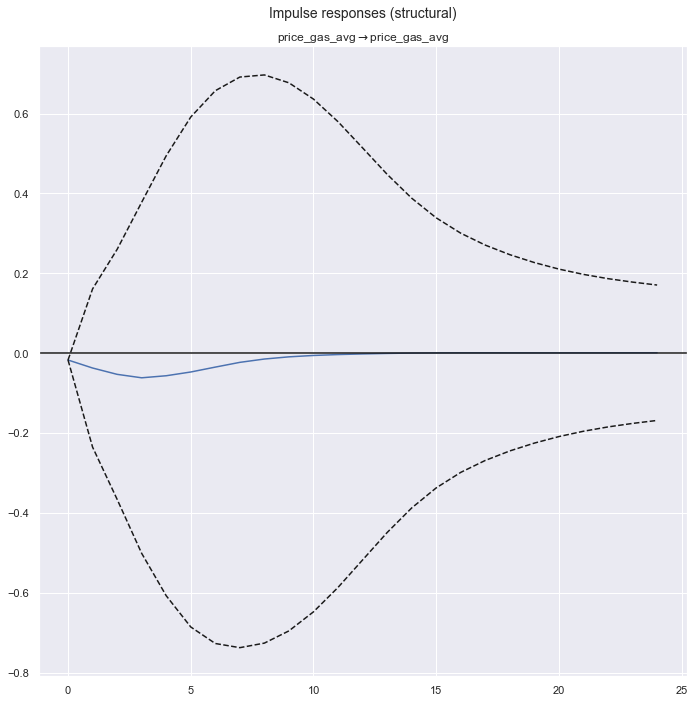

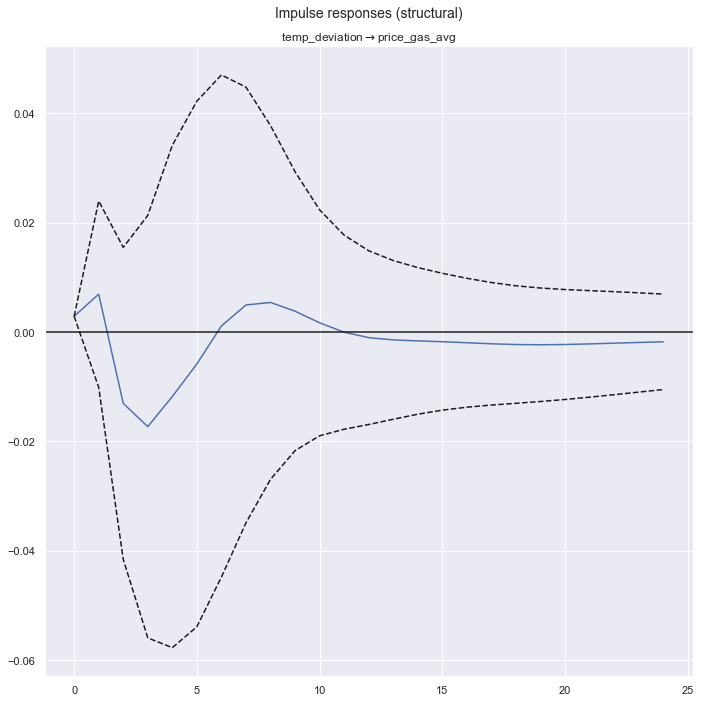

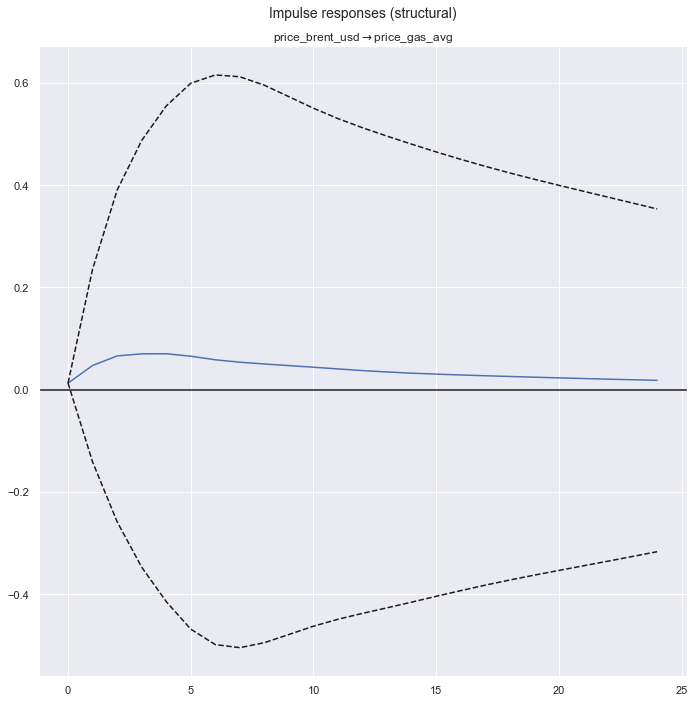

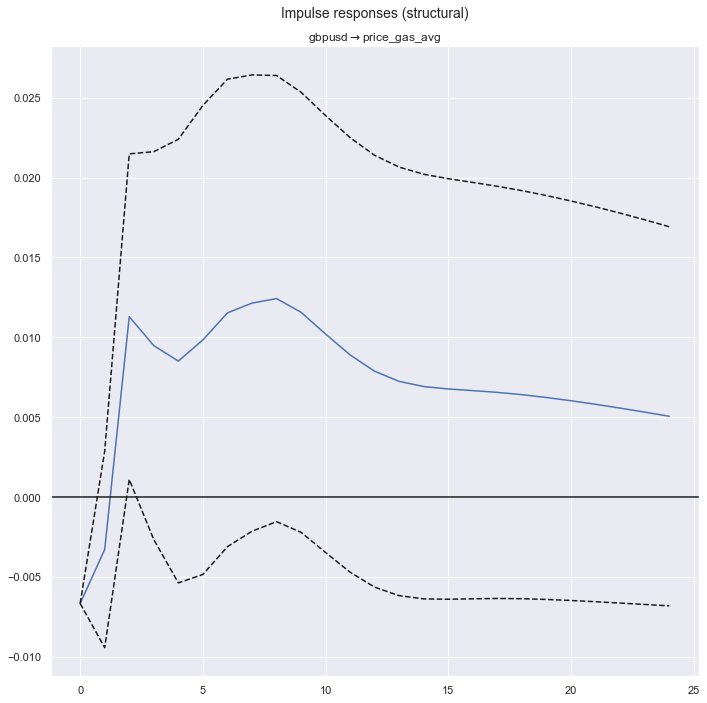

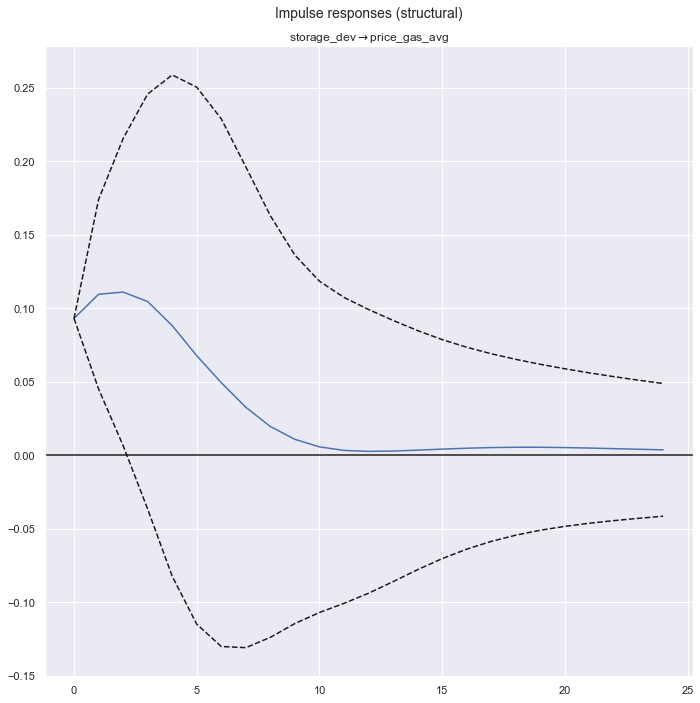

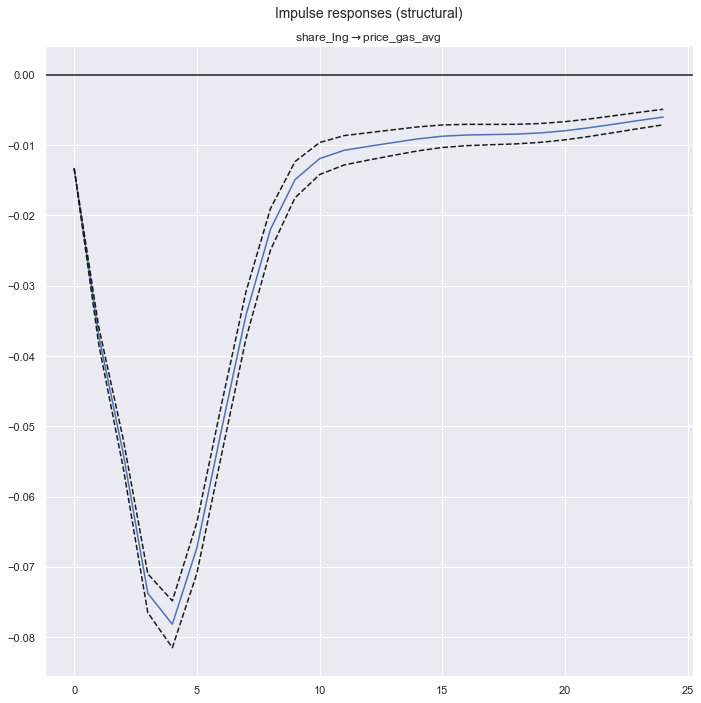

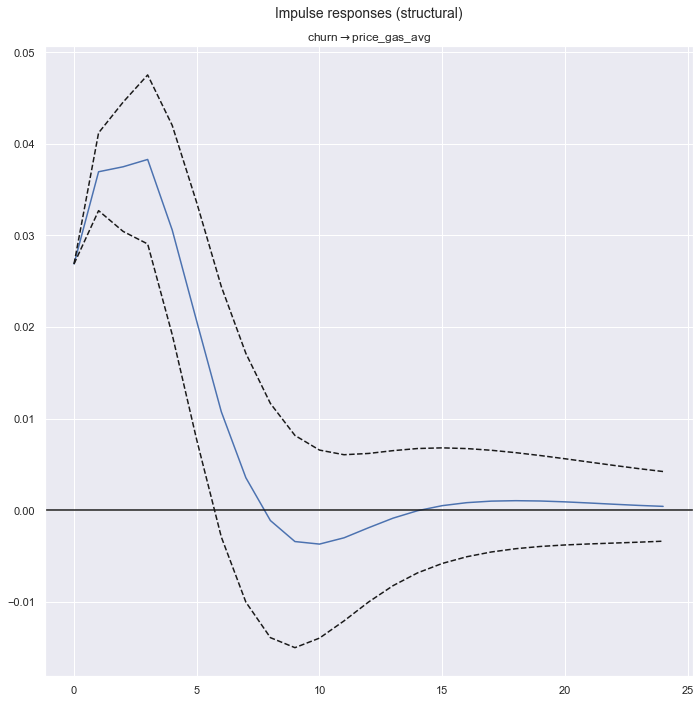

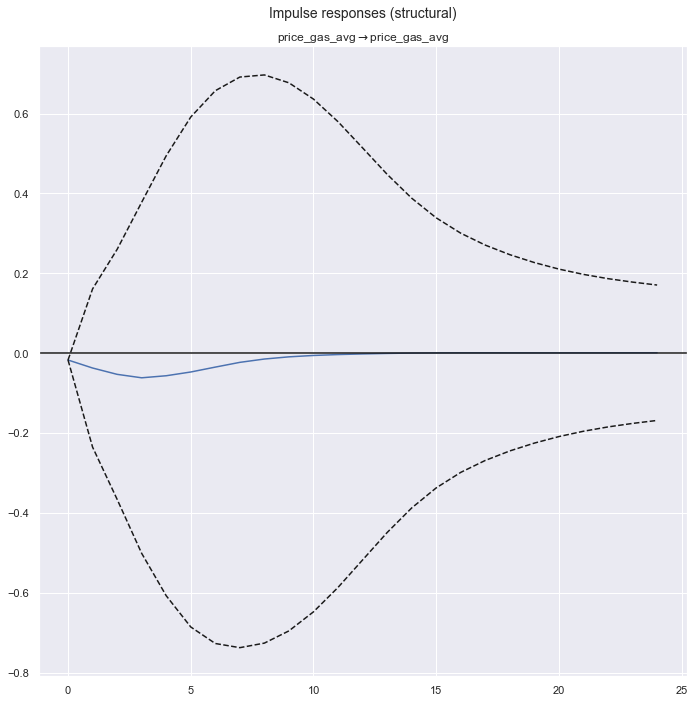

In [227]:
### IR ###

Periods=24
Reps=500
ERRORTYPE = 'asym'

ResSVAR.irf(periods=Periods).plot(impulse='temp_deviation', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='price_brent_usd', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='gbpusd', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='storage_dev', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='share_lng', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='churn', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)
ResSVAR.irf(periods=Periods).plot(impulse='price_gas_avg', response='price_gas_avg', plot_stderr=True,stderr_type=ERRORTYPE, repl=Reps)


In [228]:
### IR ###

Periods=24
Reps=50

#ResSVAR.irf(periods=Periods).plot(impulse='share_lng', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='price_brent_usd', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='gbpusd', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='gbpusd', response='share_lng', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='storage_dev', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='churn', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='temp_deviation', response='price_gas_avg', plot_stderr=True,stderr_type='mc', repl=Reps)



#ResSVAR.irf(periods=Periods).plot(impulse='price_gas_avg', response='share_lng', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='price_gas_avg', response='churn', plot_stderr=True,stderr_type='mc', repl=Reps)
#ResSVAR.irf(periods=Periods).plot(impulse='price_gas_avg', response='storage_dev', plot_stderr=True,stderr_type='mc', repl=Reps)


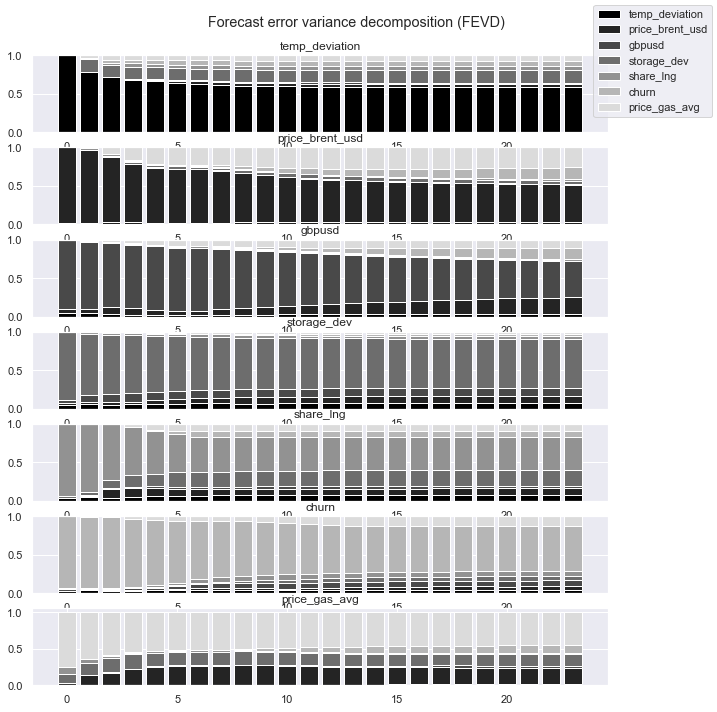

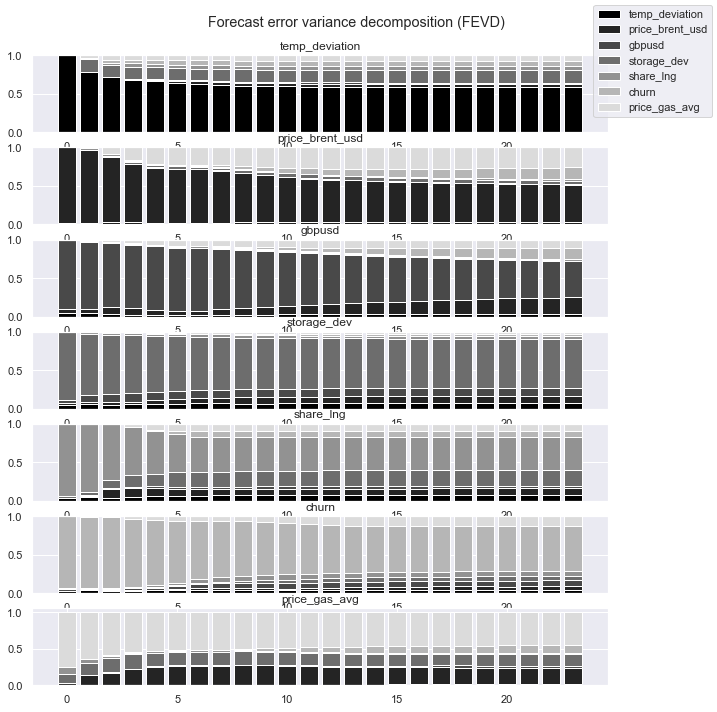

In [229]:
#### FEVD ####


#only for 20 periods
n=24
fevd = model_fit.fevd(n)
#fevd.summary()

#affichage pour n périodes
model_fit.fevd(n).plot()

[[0.006911326927086264, 2.5771438948408405, 0.018319439591977172, 12.432417191107252, 9.585212434487735, 0.1599046271059888, 75.22009108593912], [0.027970733893852642, 13.525099385908057, 0.009144068036205918, 17.446819897226582, 4.515730352504349, 0.33121038451443324, 64.1440251779165], [0.41375681813470355, 17.02150734576719, 0.12074449910901408, 19.968238075477657, 2.4933780902092315, 1.2115271838186619, 58.770847987483535], [0.5638800548747176, 21.86271895779546, 0.21026900263596865, 20.03622327118198, 1.5596941375584565, 1.253378348529756, 54.513836227423674], [0.4059783240406644, 24.639833787502212, 0.8214432399207583, 18.89244173170517, 1.4798977296295162, 1.0783296680515144, 52.68207551915018], [0.38914911732141694, 25.79630952488258, 0.9525279250716131, 18.69084807304125, 1.5941009680084957, 0.9630020470837527, 51.61406234459089], [0.49732391569459733, 26.108900662108198, 0.9175023547073833, 18.5477917878212, 1.5836317568369926, 0.8579237030119813, 51.48692581981966], [0.47740

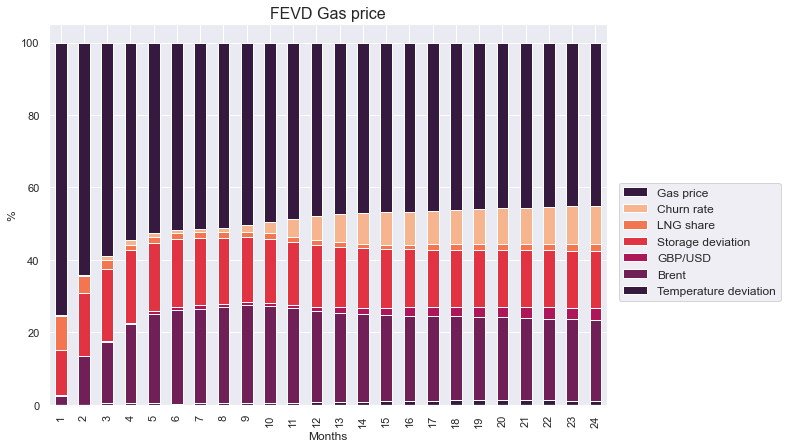

<Figure size 432x288 with 0 Axes>

In [230]:
#print(dir(fevd))
#print(fevd.decomp)

index = 6

gas = fevd.decomp[6]

res = []
for i in range(0,len(gas)):
    sub=[]
    for y in gas[i]:
        sub.append(y*100)
    #print(i)
    #print(sub)
    res.append(sub)
    
print(res)
fevd.summary()


fevd_temp=[]
fevd_brent=[]
fevd_gbp=[]
fevd_storage=[]
fevd_lng=[]
fevd_churn=[]
fevd_gas=[]

for i in range(0,len(res)):
    fevd_temp.append(res[i][0])
    fevd_brent.append(res[i][1])
    fevd_gbp.append(res[i][2])
    fevd_storage.append(res[i][3])
    fevd_lng.append(res[i][4])
    fevd_churn.append(res[i][5])
    fevd_gas.append(res[i][6])


df_fevd = pd.DataFrame({'Temperature deviation': fevd_temp,
                    'Brent':fevd_brent,
                    'GBP/USD': fevd_gbp,
                    'Storage deviation':fevd_storage,
                    'LNG share':fevd_lng,
                    'Churn rate': fevd_churn,
                    'Gas price':fevd_gas,
                    'period':np.linspace(1,24,24,dtype=int)})
 
sns.set_theme(style="darkgrid")

#bar1 = sns.barplot(x="period",  y="Temperature deviation", data=df_fevd)
#bar2 = sns.barplot(x="period",  y="Brent", data=df_fevd, color='grey')
#bar3 = sns.barplot(x="period",  y="GBP/USD", data=df_fevd, color='darkblue')
#bar4 = sns.barplot(x="period",  y="Storage deviation", data=df_fevd, color='darkblue')
#bar5 = sns.barplot(x="period",  y="LNG share", data=df_fevd, color='darkblue')
#bar6 = sns.barplot(x="period",  y="Churn rate", data=df_fevd, color='darkblue')
#bar7 = sns.barplot(x="period",  y="Gas price", data=df_fevd, color='darkblue')


df_fevd.set_index('period').plot(kind='bar', stacked=True, color=sns.color_palette("rocket"),figsize=(10, 7))
plt.title('FEVD Gas price', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('%', fontsize=12)
plt.legend(reversed(plt.legend().legendHandles), reversed(df_fevd.columns[0:-1]),bbox_to_anchor=(1.01, 0.6), loc='upper left',fontsize=12)

plt.figure()

plt.savefig('fevd.png')


In [272]:
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import numpy.linalg as npl

##### ADAPT IMPULSE TO HAVE ONE OR TWO STDEV #####

fitted = ResSVAR
fitted.exog=None
fitted.trend='n'
T = 24 #periods
alpha = -1

P = np.dot(npl.inv(fitted.A), fitted.B)


J = fitted.svar_ma_rep(T,P=P)
shock= alpha*fitted.sigma_u
J = shock*np.array(J)

print(df_corr.describe())


print(J[0])
#print(J[1])


       temp_deviation  price_brent_usd      gbpusd  storage_dev   share_lng  \
count      126.000000       126.000000  126.000000   126.000000  126.000000   
mean         0.205225         4.224968  144.484632     0.005635   25.189461   
std          1.434913         0.429194   14.803563     0.340053   20.745806   
min         -4.838333         2.832699  121.589400    -0.990000    0.278742   
25%         -0.855833         3.911438  130.559625    -0.197500   10.009182   
50%          0.213333         4.126893  143.100200    -0.015000   21.016145   
75%          1.208333         4.696314  157.757150     0.237500   33.122528   
max          5.261667         4.866745  170.340300     1.400000  103.164600   

            churn  price_gas_avg  
count  126.000000     126.000000  
mean    19.619048       3.827157  
std      6.087176       0.359369  
min      7.000000       2.449649  
25%     15.000000       3.664715  
50%     20.000000       3.910164  
75%     24.000000       4.079670  
max     

In [273]:
G,H = fitted.sirf_errband_mc(steps=T, signif=0.05, burn=100, cum=False, repl=100)

/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lucruffie/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lucruffie/Library/Pyt

/var/folders/3g/sgwzgbxd267175khjfmq_7w80000gn/T/ipykernel_33882/3692808885.py:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k-', linewidth=2, color='black')
/var/folders/3g/sgwzgbxd267175khjfmq_7w80000gn/T/ipykernel_33882/3692808885.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, mid, 'k-', linewidth=1, color='green')


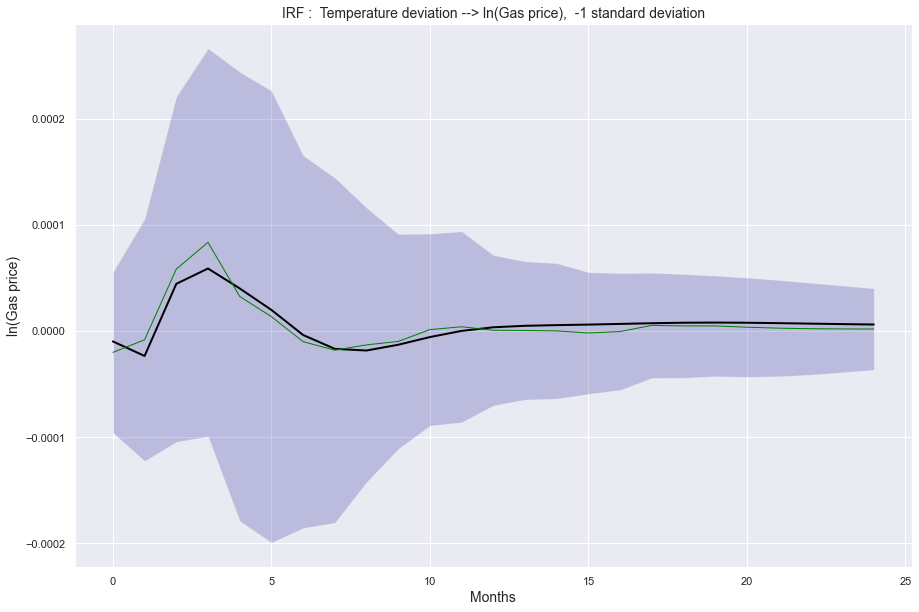

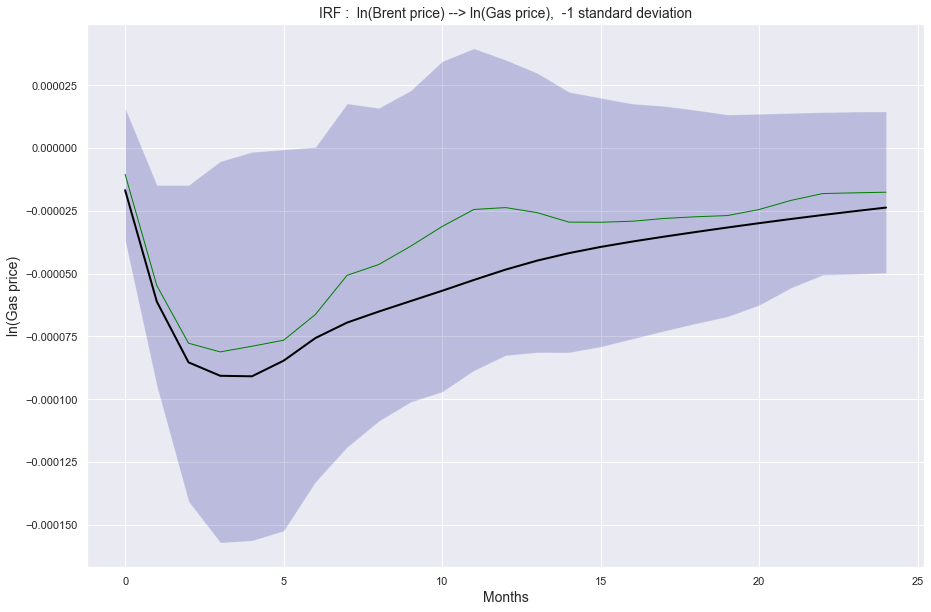

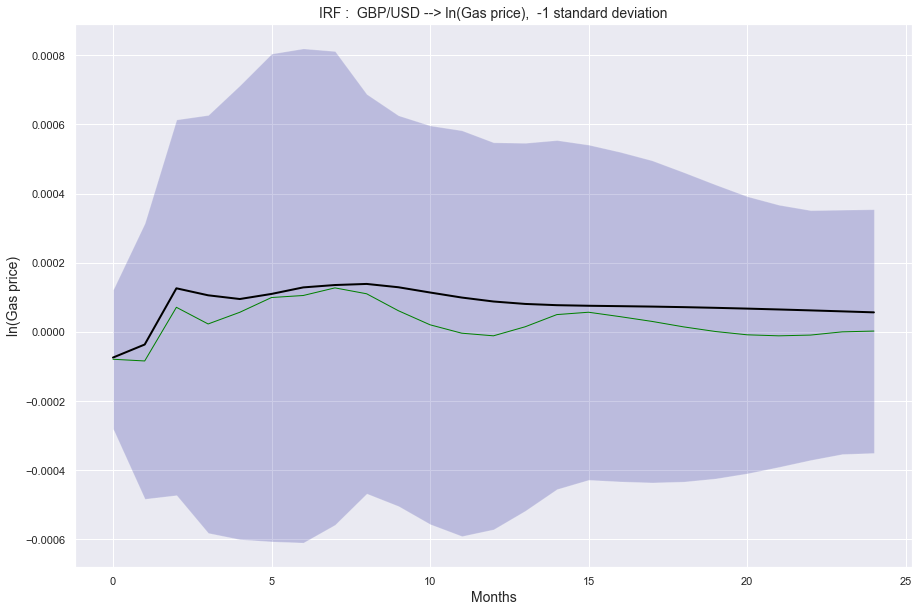

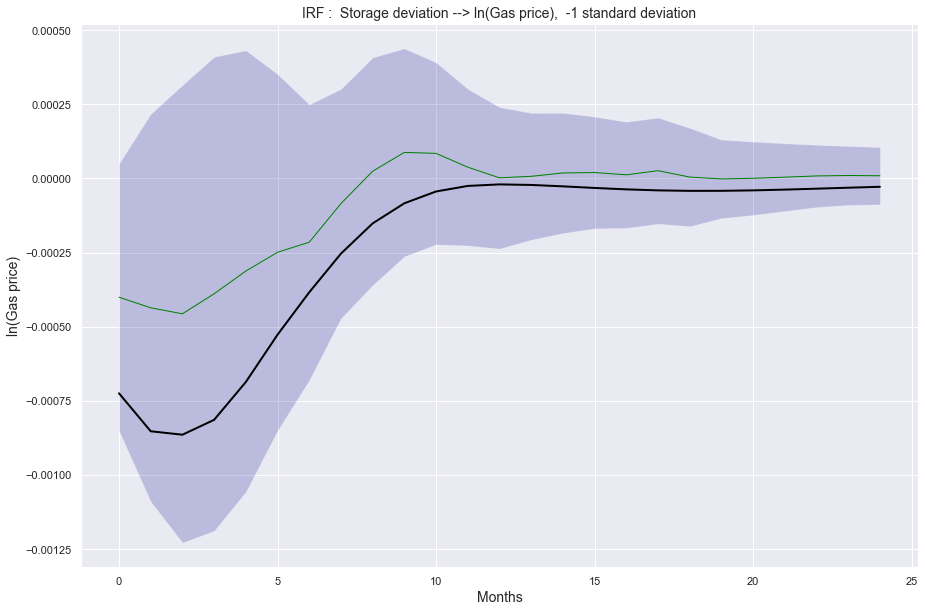

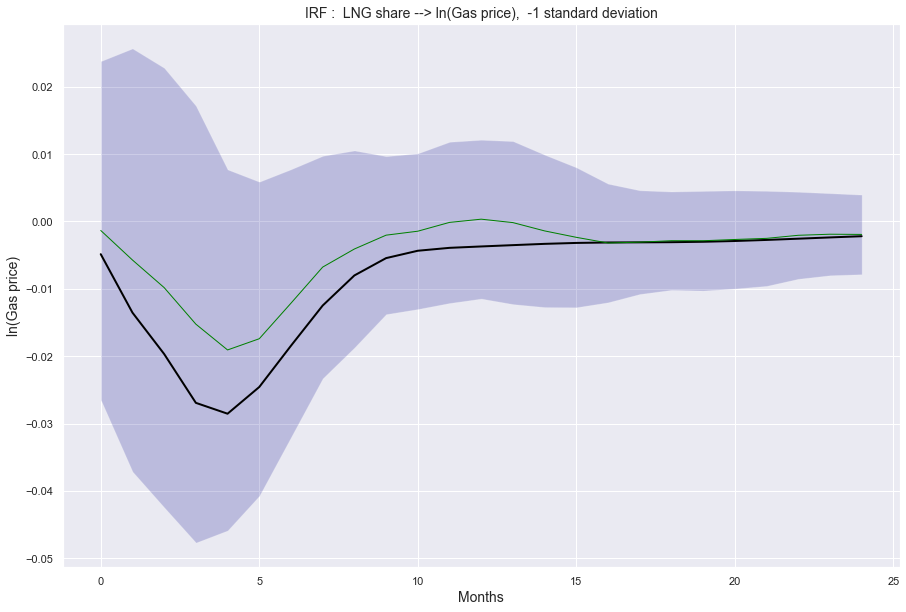

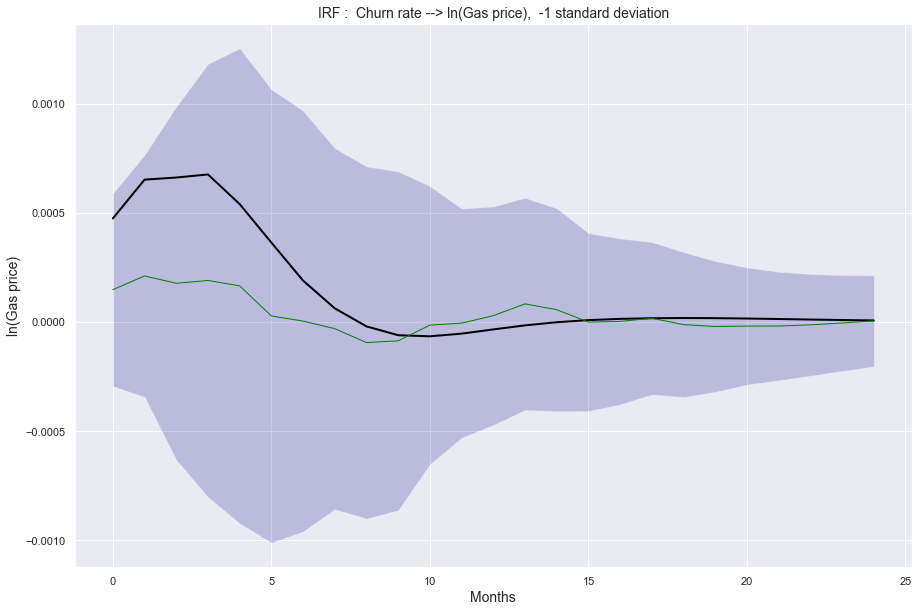

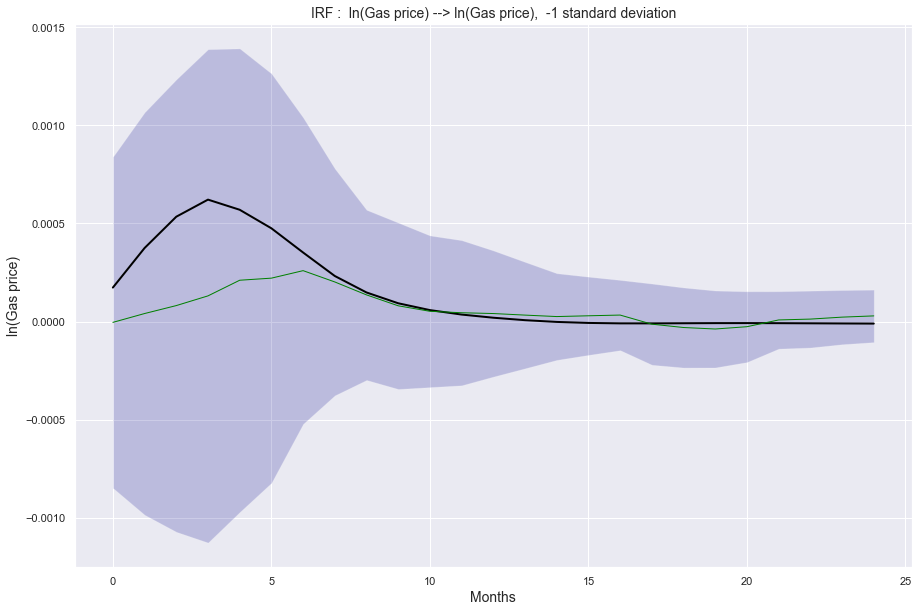

In [274]:

time=np.linspace(0,24,25)

IRFtot=[]
for k in range(0,7):
    response=[]
    for j in range(0,7):
        temp=[]
        for i in range(0,len(J)):
            temp.append(J[i][j][k])
        response.append(temp)
    IRFtot.append(response)

# indexes for IRFtot , 1st index is the impact, 2nd is the impulse, 

##### ERROR BANDS ##### 
UpperBD=[]
LowerBD=[]

for k in range(0,7):
    response=[]
    for j in range(0,7):
        temp=[]
        for i in range(0,len(J)):
            temp.append(H[i][j][k]*shock[j][k])
        response.append(temp)
    UpperBD.append(response)

for k in range(0,7):
    response=[]
    for j in range(0,7):
        temp=[]
        for i in range(0,len(J)):
            temp.append(G[i][j][k]*shock[j][k])
        response.append(temp)
    LowerBD.append(response)

##### PLOTTING ##### 

import seaborn as sns
sns.set_theme(style="darkgrid")


impact = 6

indexes= ['Temperature deviation', 'ln(Brent price)', 'GBP/USD', 'Storage deviation', 'LNG share', 'Churn rate','ln(Gas price)']

for impulse in range(0,7):
    up=UpperBD[impulse][impact]
    y=IRFtot[impulse][impact]
    low=LowerBD[impulse][impact]
    mid=[(a + b)/2 for (a, b) in zip(up, low)] 
    x=time


    plt.figure(figsize=(15,10))
    plt.plot(x, y, 'k-', linewidth=2, color='black')
    plt.plot(x, mid, 'k-', linewidth=1, color='green')
    plt.fill_between(x,low, up, facecolor='darkblue', alpha=0.2)
    plt.xlabel("Months", fontsize=14)
    plt.ylabel(indexes[impact], fontsize=14)

    plt.title("IRF :  " +  indexes[impulse] +" --> " + indexes[impact] +',  ' + str(alpha) +  ' standard deviation', fontsize=14)
    plt.show()




FORECASTING BELOW:

[[ 1.06833333e+00  3.81745181e+00  1.36306600e+02 -1.30000000e-01
   2.17823300e+01  9.00000000e+00  3.85895370e+00]
 [-3.83333333e-02  3.90452666e+00  1.37060100e+02 -3.90000000e-01
   9.74967500e+00  7.00000000e+00  4.07711363e+00]
 [-1.39000000e+00  4.02756495e+00  1.39300000e+02 -7.00000000e-02
   2.53933600e+01  8.00000000e+00  3.79988401e+00]
 [ 1.46666667e-01  4.06954145e+00  1.37466500e+02 -2.90000000e-01
   3.25091200e+01  8.00000000e+00  3.79505920e+00]
 [ 1.88333333e-01  4.05214090e+00  1.39528400e+02  5.60000000e-01
   3.30818400e+01  8.00000000e+00  3.94023138e+00]
 [-2.49666667e+00  4.09996745e+00  1.41803700e+02  2.50000000e-01
   2.75905300e+01  9.00000000e+00  4.15279551e+00]
 [-1.89333333e+00  4.15609690e+00  1.38427500e+02  4.00000000e-01
   2.58903200e+01  1.20000000e+01  4.26824057e+00]]
49
[[ -5.35068281   4.25885441 134.57790333  -0.41004884 -15.63806787
   15.65636699   4.18226319]
 [ -4.40107258   4.22008462 133.90395962  -0.60068892 -28.36571598
   15.54975519

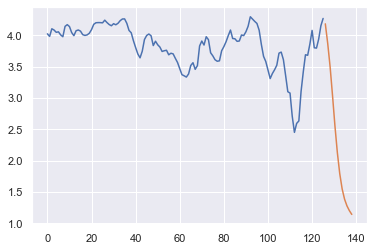

In [275]:
#### Forecast ####

#from fractions import Fraction


from numpy import linspace


yarray=df_corr.to_numpy()
#print(y)
y=yarray[119:,:]
print(y)
print(y.size)
ResSVAR.exog = None
ResSVAR.coefs_exog = np.array(0)
ResSVAR.trend = "n"

steps = 12
ForecastSVAR = ResSVAR.forecast(y,steps)

print(ForecastSVAR)
ForecastPriceGas = ForecastSVAR[:,6]

serie=yarray[:,6]
print(serie.size)
length=serie.size
xserie = np.linspace(0,length-1,length)
xforecast = np.linspace(length,length+steps,steps)

print(xserie.size)
print(xforecast.size)


print()
plt.plot(xserie,serie)
plt.plot(xforecast,ForecastPriceGas)
plt.show()


138
[ 38.1766055   42.19933471  46.1807625   50.28422479  54.36788751
  58.41482428  62.4692303   66.47527261  70.45160856  74.59344374
  78.76266016  82.90118833  86.94381344  90.93696867  95.0090027
  99.09295252 103.15879472 107.16853607 111.16589763 115.17165105
 119.20366528 123.29373405 127.46804774 131.66751642 135.86960865
 140.07123007 144.26942401 148.51012467 152.71329646 156.88427995
 161.03594171 165.22057066 169.38764454 173.5785467  177.81183372
 182.07142365 186.3322507  190.52281412 194.5998684  198.63912803
 202.55153191 206.35475414 210.05556217 213.69525138 217.44065743
 221.37263457 225.36905467 229.38869365 233.38042644 237.21579464
 241.12073261 244.9690313  248.78026534 252.52143224 256.2744382
 260.03476837 263.72289754 267.43574873 271.13844143 274.77007003
 278.33486681 281.80064959 285.17128958 288.52399675 291.8563203
 295.23886867 298.75654184 302.31837225 305.7744283  309.28885966
 313.11804956 317.02537062 320.86900261 324.84521181 328.77522207
 332.4955

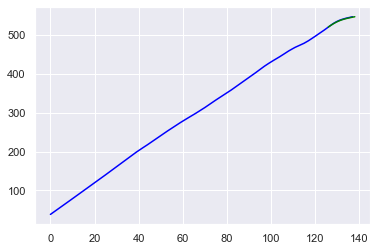

In [276]:
#### DIFF INV ####
diff_total = np.concatenate((yarray[:,6], ForecastPriceGas), axis=0)
#print(yarray[:,4])
#print(set_total)

length_set = yarray[:,6].size + steps
print(length_set)
PriceReal = np.linspace(0,length_set,length_set)
PriceReal[0] = dprice_gas.values[0]

for i in range(1,length_set):
    PriceReal[i] = diff_total[i-1] + PriceReal[i-1]

print(PriceReal)
forecasted = PriceReal[-steps:]
print(forecasted)
print(PriceReal.size)

plt.plot(PriceReal, color='blue')
plt.plot(xforecast,forecasted,color="green")
plt.show()


(array([[ -5.35068281,   4.25885441, 134.57790333,  -0.41004884,
        -15.63806787,  15.65636699,   4.18226319],
       [ -4.40107258,   4.22008462, 133.90395962,  -0.60068892,
        -28.36571598,  15.54975519,   3.86820291],
       [ -3.10825825,   4.04279386, 129.02881145,  -0.63506   ,
        -30.94382908,  17.83136448,   3.49428824],
       [ -1.94676842,   3.75405593, 125.64222572,  -0.60529946,
        -16.71429125,  19.86605308,   3.03514792],
       [ -1.25281022,   3.48270346, 121.68267613,  -0.47719286,
          2.09097459,  22.51350589,   2.55287915],
       [ -0.89535528,   3.25038671, 117.66366095,  -0.37591654,
         19.34299047,  25.74442353,   2.12798819],
       [ -0.75185104,   3.03453953, 113.64161456,  -0.27492567,
         28.79123271,  28.37046989,   1.78988696],
       [ -0.68428605,   2.82449879, 109.43637374,  -0.25709545,
         33.59398017,  29.39588193,   1.54622178],
       [ -0.49877372,   2.61853614, 105.10754983,  -0.26341896,
         34.478

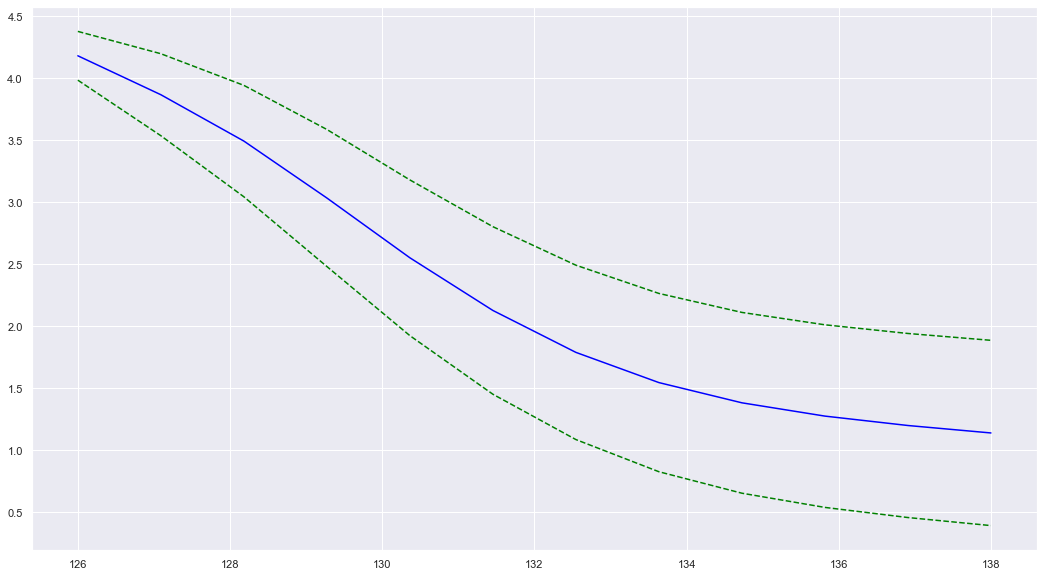

[266.30304868 269.84054268 272.88546779 275.36793066 277.29273183
 278.74496382 279.83156409 280.65873239 281.31266092 281.85203306
 282.30966809 282.70239765]


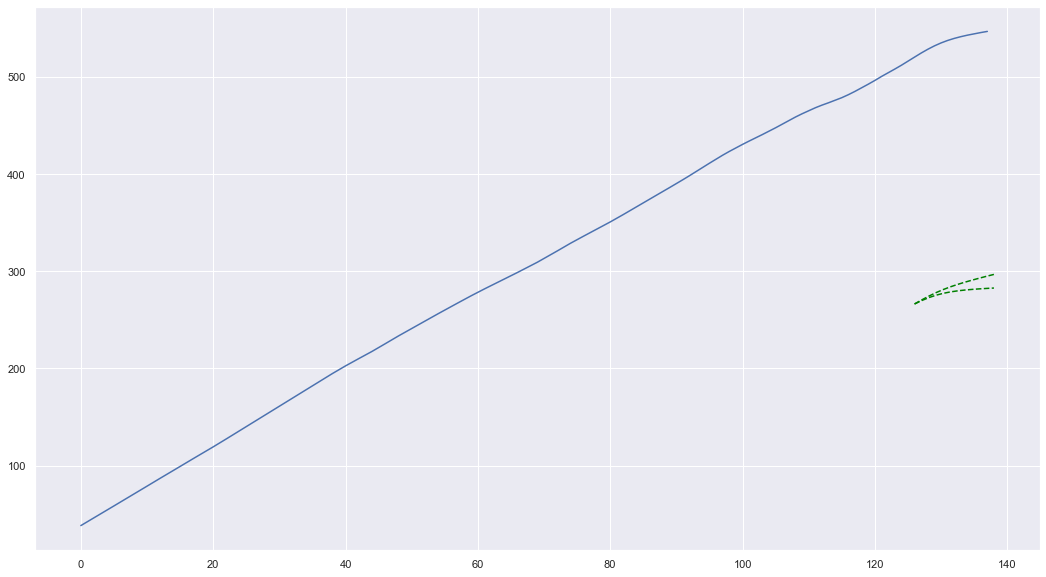

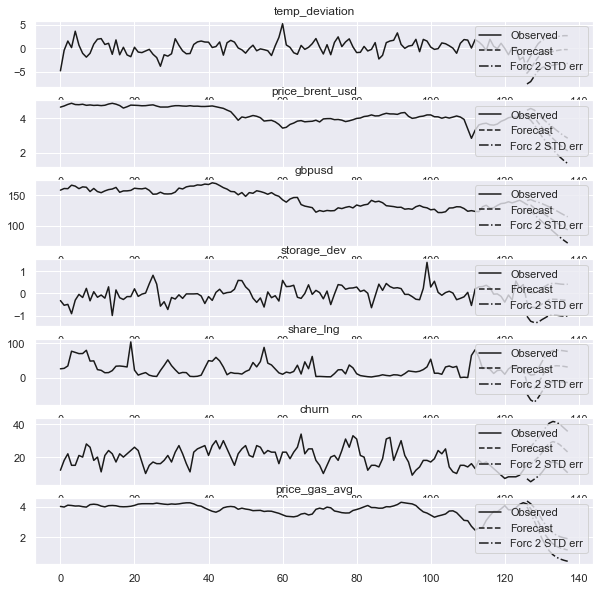

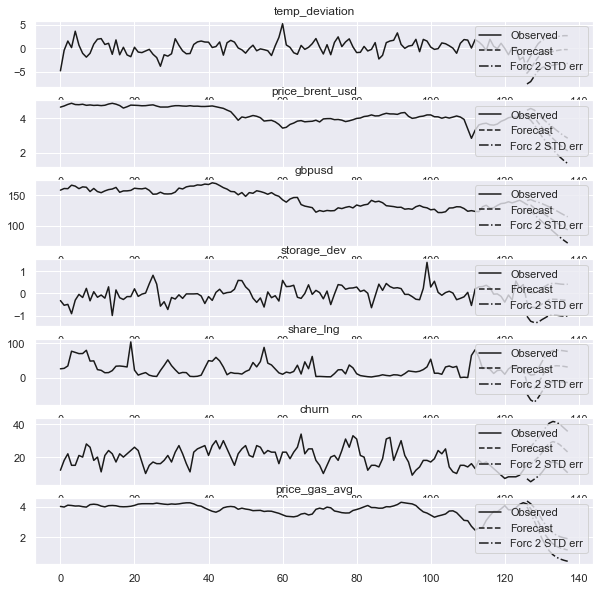

In [277]:
ForecastIntSVAR = ResSVAR.forecast_interval(y,steps)
print(ForecastIntSVAR)

# differenciated
UpBandDiff = ForecastIntSVAR[2][:,6]
LowBandDiff = ForecastIntSVAR[1][:,6]
MidDiff = ForecastIntSVAR[0][:,6]

plt.figure(figsize=(18, 10))
plt.plot(xforecast,UpBandDiff, color ="green",linestyle='dashed')
plt.plot(xforecast,LowBandDiff, color="green",linestyle='dashed')
plt.plot(xforecast,MidDiff,color="blue")
plt.show()


# integrated
last_val = dprice_gas.values[-1]

UpBand = UpBandDiff
LowBand = LowBandDiff 

UpBand[0] = last_val
LowBand[0] = last_val

for i in range(1,steps):
    UpBand[i] = UpBand[i-1] + UpBandDiff[i]
    LowBand[i] = LowBand[i-1] + LowBandDiff[i]

print(LowBand)
xforecast = np.linspace(length,length+steps,steps)

plt.figure(figsize=(18, 10))
plt.plot(xforecast,UpBand, color ="green",linestyle='dashed')
plt.plot(xforecast,LowBand, color ="green",linestyle='dashed')
plt.plot(PriceReal)
plt.show()

ResSVAR.plot_forecast(steps)

#ResSVAR.plotsim()

In [287]:
variables = ['temp_deviation','price_brent_usd','gbpusd','storage_dev','share_lng','churn','price_gas_avg']

for var in variables:
    long_run = ResSVAR.test_inst_causality(var)
    print(long_run.summary())

Instantaneous causality Wald-test. H_0: temp_deviation does not instantaneously cause [price_brent_usd, gbpusd, storage_dev, share_lng, churn, price_gas_avg]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         12.99          12.59   0.043  6
----------------------------------------
Instantaneous causality Wald-test. H_0: price_brent_usd does not instantaneously cause [temp_deviation, gbpusd, storage_dev, share_lng, churn, price_gas_avg]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         14.95          12.59   0.021  6
----------------------------------------
Instantaneous causality Wald-test. H_0: gbpusd does not instantaneously cause [temp_deviation, price_brent_usd, storage_dev, share_lng, churn, price_gas_avg]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
-------

(array([[[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+0

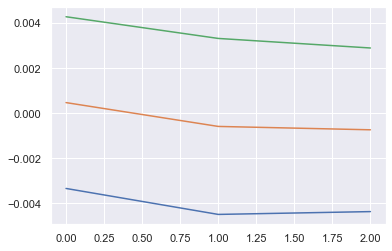

3
3
[266.30304868 267.57939613 268.77882628]
266.303048676345
[1.276347456556112, 1.1994301481615857, 1.13922163560243]
3


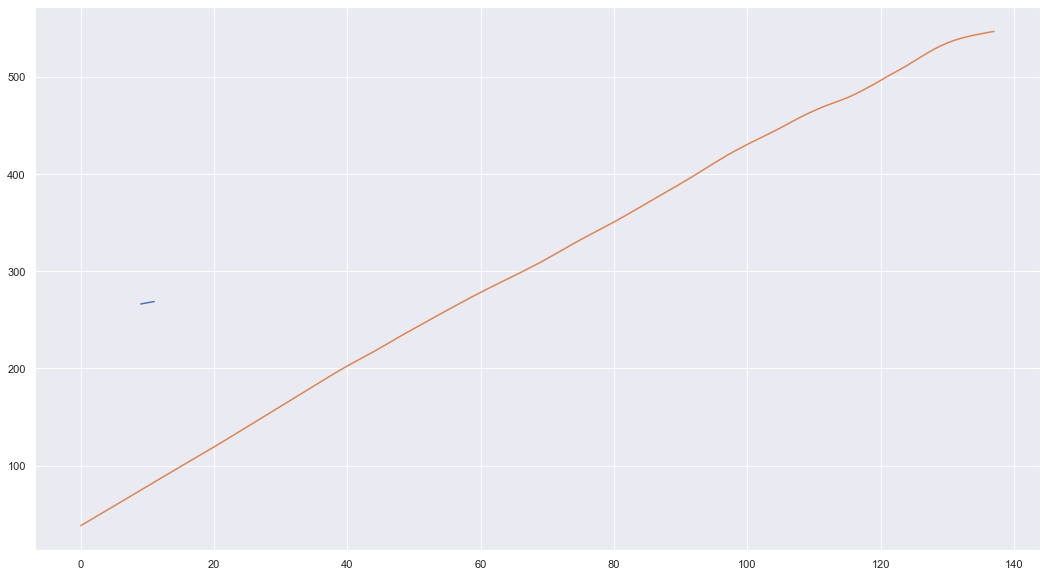

In [288]:
#### SCENARIOS FORECAST ####

ResimBand = ResSVAR.irf_errband_mc(steps=steps,cum=False) #Tuple of lower and upper arrays of ma_rep monte carlo standard errors
Resim = ResSVAR.irf_resim()
print(ResimBand)

print(ResimBand[0])
UpperBand = []
LowerBand = []
Mid = []

for i in range(1,steps+1):
    UpperBand.append(ResimBand[0][i][3][4])
    LowerBand.append(ResimBand[1][i][3][4])



print("---------------------------")
print(UpperBand)

print("---------------------------")
print(LowerBand)


for i in range(0, steps):
    Mid.append((UpperBand[i] + LowerBand[i])/2)


plt.plot(UpperBand)
plt.plot(Mid)
plt.plot(LowerBand)
plt.show()

###########################

MidDiffTot = []
diff_forecast = diff_total[-steps:]
print(len(diff_forecast))
print(len(Mid))
for i in range(0,len(Mid)):
    MidDiffTot.append(Mid[i] + diff_forecast[i])

MidImp = np.linspace(0,steps,steps)
MidImp[0] = last_val

for i in range(1,steps):
    MidImp[i] = MidImp[i-1] + MidDiffTot[i-1]

print(MidImp)
print(last_val)
print(MidDiffTot)
print(len(MidImp))
plt.figure(figsize=(18, 10))
plt.plot(xforecast,MidImp)
plt.plot(PriceReal)
plt.show()

FORECAST FOR NON DIFFERENTIATED VALUES:

[[-4.83833333e+00  4.64324144e+00  1.58293000e+02 -3.20000000e-01
   2.56059000e+01  1.20000000e+01  4.02272921e+00]
 [-4.40000000e-01  4.71026691e+00  1.61004700e+02 -5.30000000e-01
   2.68918900e+01  1.80000000e+01  3.98142779e+00]
 [ 1.54666667e+00  4.80066490e+00  1.60740700e+02 -4.90000000e-01
   3.38843000e+01  2.20000000e+01  4.10346229e+00]
 [ 1.38333333e-01  4.86674528e+00  1.66500200e+02 -9.10000000e-01
   7.63532800e+01  1.50000000e+01  4.08366271e+00]
 [ 3.65333333e+00  4.79260134e+00  1.64877700e+02 -3.00000000e-01
   7.29411800e+01  1.50000000e+01  4.04693678e+00]
 [ 6.56666667e-01  4.78353382e+00  1.60758800e+02 -4.00000000e-02
   6.94158100e+01  2.10000000e+01  4.05440602e+00]
 [-1.08666667e+00  4.80985955e+00  1.63684900e+02 -1.80000000e-01
   6.96629200e+01  2.00000000e+01  4.00604231e+00]
 [-1.90833333e+00  4.74766664e+00  1.63076300e+02  2.30000000e-01
   7.90393000e+01  2.80000000e+01  3.97633596e+00]
 [-1.08000000e+00  4.76955322e+00  1.55994100e+02 -3.30000000e-0

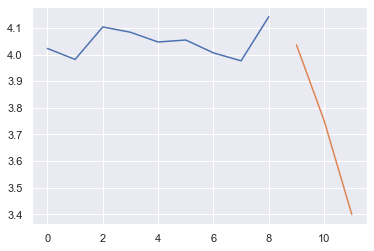

In [289]:
ResSVAR.exog = None
ResSVAR.coefs_exog = np.array(0)
ResSVAR.trend = "c"

steps = 3
index = steps*3
df_forecast=df_corr.head(index)
yarray=df_forecast.to_numpy()
print(yarray)


ForecastSVAR = ResSVAR.forecast(yarray,steps)
ForecastPriceGas = ForecastSVAR[:,6]

serie=yarray[:,6]
print(serie.size)
length=serie.size
xserie = np.linspace(0,length-1,length,dtype=int)
xforecast = np.linspace(length,length+steps-1,steps,dtype=int)

print(xserie)
print(xforecast)

print()
plt.plot(xserie,serie)
plt.plot(xforecast,ForecastPriceGas)
plt.show()

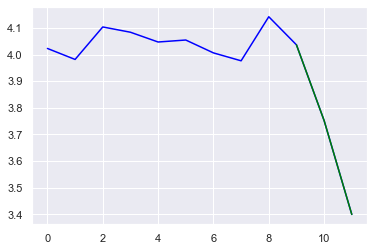

In [290]:
total = np.concatenate((yarray[:,6], ForecastPriceGas), axis=0)
#print(yarray[:,4])
#print(set_total)

length_set = yarray[:,6].size + steps

plt.plot(total, color='blue')
plt.plot(xforecast,ForecastPriceGas,color="green")
plt.show()

(array([[ -5.35068281,   4.25885441, 134.57790333,  -0.41004884,
        -15.63806787,  15.65636699,   4.18226319],
       [ -4.40107258,   4.22008462, 133.90395962,  -0.60068892,
        -28.36571598,  15.54975519,   3.86820291],
       [ -3.10825825,   4.04279386, 129.02881145,  -0.63506   ,
        -30.94382908,  17.83136448,   3.49428824]]), array([[ -7.66358997,   4.05597628, 127.93263186,  -1.02465468,
        -47.45120231,   6.81538619,   3.98560026],
       [ -7.1515338 ,   3.87578561, 124.8663181 ,  -1.24929635,
        -64.24439211,   5.00020066,   3.53749401],
       [ -5.95109807,   3.61625885, 117.90348078,  -1.31144919,
        -70.68395352,   6.6082495 ,   3.0449251 ]]), array([[-3.03777566e+00,  4.46173253e+00,  1.41223175e+02,
         2.04557007e-01,  1.61750666e+01,  2.44973478e+01,
         4.37892613e+00],
       [-1.65061137e+00,  4.56438364e+00,  1.42941601e+02,
         4.79185110e-02,  7.51296016e+00,  2.60993097e+01,
         4.19891182e+00],
       [-2.654184

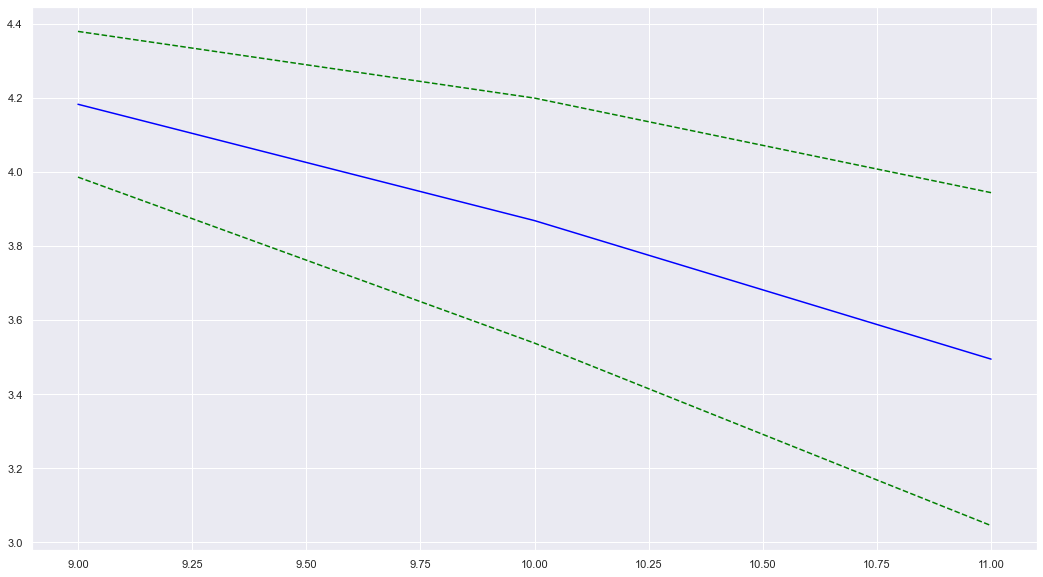

In [291]:
ForecastIntSVAR = ResSVAR.forecast_interval(y,steps)
print(ForecastIntSVAR)

# differenciated
UpBand = ForecastIntSVAR[2][:,6]
LowBand = ForecastIntSVAR[1][:,6]
Mid = ForecastIntSVAR[0][:,6]

plt.figure(figsize=(18, 10))
plt.plot(xforecast,UpBand, color ="green",linestyle='dashed')
plt.plot(xforecast,LowBand, color="green",linestyle='dashed')
plt.plot(xforecast,Mid,color="blue")
plt.show()

In [292]:
def do_forecast(index,steps,M,set):
    yarray=set.to_numpy()
    ForecastSVAR = ResSVAR.forecast(yarray,steps)
    ForecastPriceGas = ForecastSVAR[:,6][0]

    ### error bands
    ForecastIntSVAR = ResSVAR.forecast_interval(yarray,steps)
    UpBand = ForecastIntSVAR[2][:,6][0]
    LowBand = ForecastIntSVAR[1][:,6][0]


    return [ForecastPriceGas,UpBand,LowBand]

index=110
set=df_corr.head(index)
print(set)
fcst = do_forecast(index,3,1,set)
print(fcst)

     temp_deviation  price_brent_usd    gbpusd  storage_dev  share_lng  churn  \
15        -4.838333         4.643241  158.2930        -0.32  25.605900     12   
16        -0.440000         4.710267  161.0047        -0.53  26.891890     18   
17         1.546667         4.800665  160.7407        -0.49  33.884300     22   
18         0.138333         4.866745  166.5002        -0.91  76.353280     15   
19         3.653333         4.792601  164.8777        -0.30  72.941180     15   
..              ...              ...       ...          ...        ...    ...   
120        0.531667         4.007210  129.0173         0.10  33.607880     14   
121        0.015000         4.064709  129.3000         0.02  29.628360     11   
122       -1.081667         4.128466  131.1303        -0.28  32.719080     10   
123        1.061667         4.068684  130.8900        -0.22   0.278742     15   
124        1.860000         3.931810  128.1839        -0.15   1.331597     15   

     price_gas_avg  
15    

In [293]:
##### compare forecast and actual value #####
def compare_forecast_real(index,M,price,up,low):
    # M months ahead
    #### actual price comparison####
    index_price_real = index + M
    price_real = df_corr.loc[index_price_real]
    price_real_sing = price_real[6]
    #print(price_real_sing)

    #### diff forecast ####
    error = (price-price_real_sing)/price_real_sing*100
    print(error)
    #### is within the errorbands ?
    valid = price_real_sing < up and price_real_sing > low
    print(valid)
    
    return [error,valid]
 

#print(compare_forecast_real(index,1,fcst[0],fcst[1],fcst[2]))



25
-0.614265983658199
True
26
0.41281096108339593
True
27
-0.6243355558750339
True
28
-2.556522132054439
True
29
-1.7789676269993024
True
30
-2.8969657067912227
True
31
0.016465705534644857
True
32
-0.15885133689162634
True
33
-0.9967811783102493
True
34
-0.8939596367331789
True
35
-2.7366190305060125
True
36
-3.3854412909046325
True
37
-5.411094626450016
False
38
-9.054072304530084
False
39
-9.39236285312985
False
40
-13.44959631437876
False
41
-14.59380671619768
False
42
-15.94517261054001
False
43
-15.031572204448155
False
44
-12.781365441171566
False
45
-8.134354608696743
False
46
-7.547831250459365
False
47
-10.273904319534248
False
48
-13.22366377274699
False
49
-16.544302174385574
False
50
-9.159691246091143
False
51
-10.098915409463439
False
52
-9.876726234932141
False
53
-8.603224555777336
False
54
-7.202273603729729
False
55
-2.3559394146632737
True
56
-5.368581313106734
True
57
-5.573456691275504
False
58
-10.218693990094112
False
59
-14.147265603118381
False
60
-19.27095638

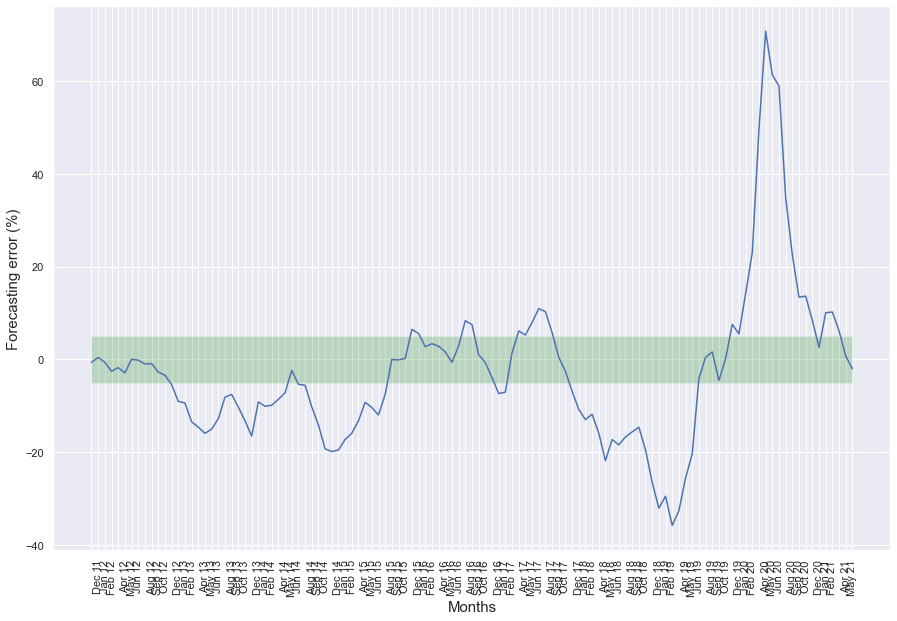

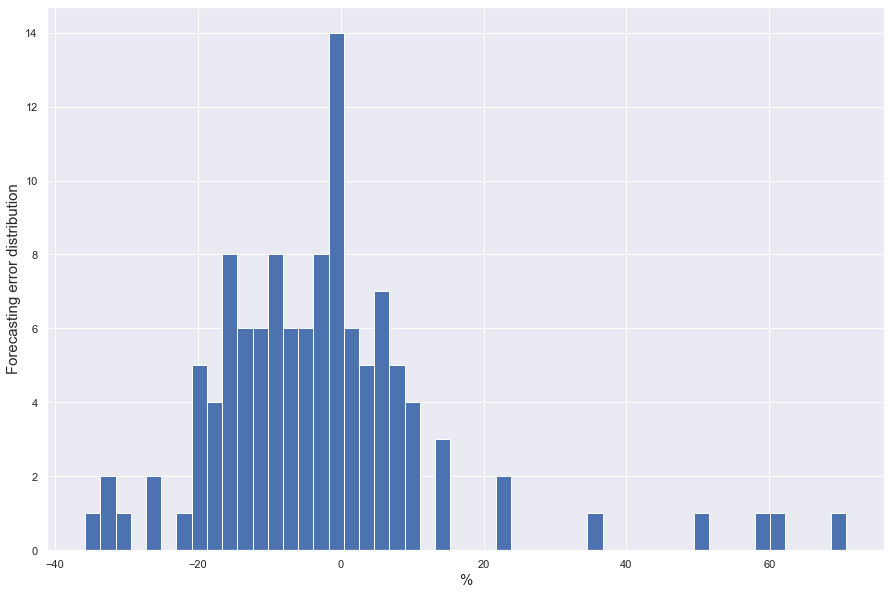

           errors
count  115.000000
mean    -2.657941
std     16.716884
min    -35.756855
25%    -12.879305
50%     -2.896966
75%      2.796656
max     70.729045
skewness errors    1.802126
dtype: float64
kurtosis errors    5.888254
dtype: float64


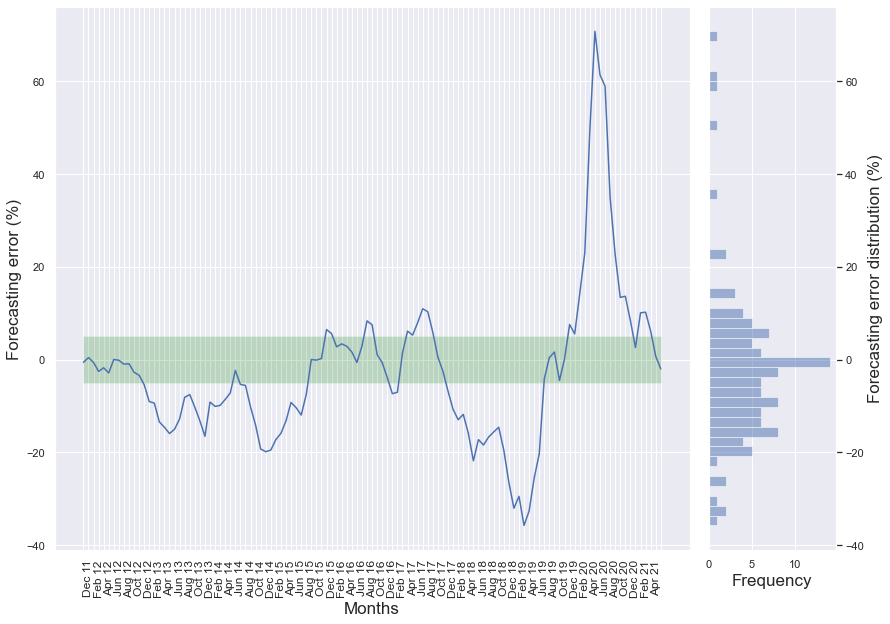

In [370]:
##### evalutate forecast over long period #####
start=25
end=139
M=1

list_error = []
list_bands = []

for index in range(start,end+1):
    print(index)
    train_set=df_corr.head(index)
    forecasted = do_forecast(index,steps=3,M=M, set=train_set)
    comp = compare_forecast_real(index,1,forecasted[0],forecasted[1],forecasted[2])
    list_error.append(comp[0])
    list_bands.append(comp[1])
    

############### PLOT ERROR BANDS ###################


print(list_bands.count(True))
print(list_bands.count(False))


############### PLOT ERRORS % ###################
xforecast = data_df.loc[start:end]['months']
level=5 # in percentages
line = np.zeros((1,len(xforecast)))[0]
lineup = [a+level for a in line]
linedown = [a-level for a in line]
print(line)


plt.figure(figsize=[15,10])
plt.plot(xforecast,list_error)    
plt.fill_between(xforecast,lineup, linedown, facecolor='green', alpha=0.2)

plt.xlabel('Months',size=15)
plt.ylabel('Forecasting relative error (%)',size=15)
ax = plt.gca()
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::4]:
    label.set_visible(False)
        
plt.show()


############### PLOT HIST ###################

plt.figure(figsize=[15,10])
plt.hist(list_error, bins=50)
plt.xlabel('%',size=15)
plt.ylabel('Forecasting relative error distribution',size=15)
plt.show()

from matplotlib import gridspec

fig = plt.figure(figsize=[14,10])
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 

ax1=plt.subplot(gs[0])
plt.xticks(rotation=90)


ax2=plt.subplot(gs[1])

ax1.plot(xforecast,list_error)
ax1.fill_between(xforecast,lineup, linedown, facecolor='green', alpha=0.2)
ax1.set_xlabel('Months',size=17)
ax1.set_ylabel('Forecasting relative error (%)',size=17)
for label in ax1.get_xticklabels():
    label.set_fontsize(12)
for label in ax1.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)


ax2.hist(list_error, orientation='horizontal', alpha=.5, bins=50)
ax2.set_xlabel('Observations',size=17)
# note this needs to be ax2 due to subtle overlay issues....
ax2.set_ylabel('Forecasting relative error distribution (%)',size=17)
#ax2.get_yaxis().set_visible(False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.draw()


############### descriptive stats ###################
df_errors=pd.DataFrame({'errors':list_error})
print(df_errors.describe())
print('skewness',df_errors.skew())
print('kurtosis',df_errors.kurt())

In [ ]:
def line_hist(x, y, ax, ax_histy):
    # no labels
    ax_histy.tick_params(axis="y", labelleft=False)

    # the line plot:
    ax.plot(x, y)
    plt.xlabel('Months',size=15)
    plt.ylabel('Forecasting error (%)',size=15)

    bins = 50
    ax_histy.hist(y, bins=bins, orientation='horizontal')


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(15, 10))

ax = fig.add_axes(rect_scatter)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

yo = plt.gca()
plt.xticks(rotation=90)
for label in yo.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
        

# use the previously defined function
line_hist(xforecast, list_error, ax, ax_histy)

plt.show()

HISTORICAL DECOMPOSITION BELOW:

In [295]:
fitted = ResSVAR
T = 24 #periods
alpha = 1

J = fitted.ma_rep(T)




historical decomposition is only applicable for stationary VAR 